# Perfil Epidemiológico de Egresos Hospitalarios
---
## Enfermedades Crónicas: Diabetes Mellitus e Hipertensión

Este pequeño proyecto personal corresponde a un ejercicio introductorio al funcionamiento diario del sistema de salud chileno. Específicamente, se trata de la elaboración de un perfil epidemiológico de los egresos hospitalarios, enfocado en los casos de diabetes mellitus e hipertensión. He decidido poner mi atención en estas enfermedades, ya que, observando mi entorno cercano, éstas son condiciones que parecen desarrollarse en paralelo con gran frecuencia en las personas de la tercera edad.

Un perfil epidemiológico es una herramienta fundamental en la salud pública que describe la frecuencia y distribución de los eventos de salud en una población específica. A través del análisis de variables de persona, lugar y tiempo, este perfil permite identificar los principales problemas de salud, las inequidades existentes y los grupos más vulnerables. Su función principal es generar evidencia sólida para orientar la toma de decisiones, priorizar la asignación de recursos y planificar intervenciones sanitarias dirigidas a mitigar el impacto de estas enfermedades crónicas en la ciudadanía.

#### Preguntas a responder:
- ¿Cómo ha evolucionado el perfil de los pacientes hospitalizados por Diabetes e Hipertensión en Chile en los últimos 10 años?
- ¿Cuál es la tendencia anual de los egresos hospitalarios para cada una de estas enfermedades?
- ¿Qué regiones presentan la mayor tasa de hospitalización?
- ¿Cuál es la distribución por edad y sexo de los pacientes?
- ¿Cuántos días de estadía hospitalaria promedian estos pacientes?

#### Fuentes de los Datos (DEIS):
1. **Bases de datos de egresos hospitalarios por año:** Formato=csv, URL=https://deis.minsal.cl/
2. **Diccionario de datos CIE-10:** Formato=MSExcel

### Se cargan las librerías requeridas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mticker
import textwrap

### Funciones para la exploración de los datos

In [2]:
def resumir_cols(df):
    i = 1
    for column_name in df.columns:
        try:
            unique_values = df[column_name].value_counts(dropna=False)
            print(f"-> Columna {i}: {unique_values}")
            print("=" * 50)
        except:
            print(f"-> No se pudieron obtener los valores posibles para la columna {column_name}")
        i += 1

def filtro_dm(df):
    dm_codes = ['E10', 'E11', 'E12', 'E13', 'E14']
    df_dm = df[df['DIAG1'].str.startswith(tuple(dm_codes), na=False)] 
    return df_dm

def filtro_hta(df):
    hta_codes = ['I10', 'I11', 'I12', 'I13', 'I14', 'I15']
    df_hta = df[df['DIAG1'].str.startswith(tuple(hta_codes), na=False)]
    return df_hta

## 1. Obtención de Datos

### 1.1. Egresos Hospitalarios (Periodos 2015 a 2024)
Dada la ausencia de una API oficial del DEIS, los datos se leerán desde los archivos estáticos (.csv) descargados de la plataforma. Cada archivo contiene la información de un año de egresos hospitalarios. Para simplificar su manipulación y procesamiento, los dataframe obtenidos de cada lectura serán almacenados en un diccionario contenedor donde cada par corresponde al nombre del conjunto de datos con el formato "df_{año del archivo}" y su respectivo dataframe.

In [3]:
data_types = {
    'PERTENENCIA_ESTABLECIMIENTO_SALUD': str,
    'SEXO':str,
    'COMUNA_RESIDENCIA': str,
    'REGION_RESIDENCIA': str,
    'PREVISION': str,
    'ANO_EGRESO': str,
    'DIAS_ESTADA': int,
    'CONDICION_EGRESO': str,
    'DIAG1': str,
    'DIAG2': str
}
 
YEARS = ['2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
egresos = {}

for year in YEARS:
    FILE_PATH = F"data/EGRE_DATOS_ABIERTOS_{year}.csv"
    try:
        df = pd.read_csv(FILE_PATH, sep=';', encoding='latin-1', encoding_errors='replace', dtype=data_types)
        egresos[f"df_{year}"] = df
        print(f"{FILE_PATH}: Se ha leído correctamente. || Contenido -> Columnas = {df.shape[1]}, Filas = {df.shape[0]}")
        print('=' * 108)
    except Exception as e:
        print(f"\nOcurrió un error al leer el archivo {FILE_PATH}: {e}")
print("Todos Los archivos de Egresos Hospitalarios se han leído correctamente.")

data/EGRE_DATOS_ABIERTOS_2015.csv: Se ha leído correctamente. || Contenido -> Columnas = 18, Filas = 1671054
data/EGRE_DATOS_ABIERTOS_2016.csv: Se ha leído correctamente. || Contenido -> Columnas = 18, Filas = 1637265
data/EGRE_DATOS_ABIERTOS_2017.csv: Se ha leído correctamente. || Contenido -> Columnas = 18, Filas = 1637150
data/EGRE_DATOS_ABIERTOS_2018.csv: Se ha leído correctamente. || Contenido -> Columnas = 18, Filas = 1669602
data/EGRE_DATOS_ABIERTOS_2019.csv: Se ha leído correctamente. || Contenido -> Columnas = 18, Filas = 1667180
data/EGRE_DATOS_ABIERTOS_2020.csv: Se ha leído correctamente. || Contenido -> Columnas = 18, Filas = 1330477
data/EGRE_DATOS_ABIERTOS_2021.csv: Se ha leído correctamente. || Contenido -> Columnas = 15, Filas = 1467062
data/EGRE_DATOS_ABIERTOS_2022.csv: Se ha leído correctamente. || Contenido -> Columnas = 18, Filas = 1597118
data/EGRE_DATOS_ABIERTOS_2023.csv: Se ha leído correctamente. || Contenido -> Columnas = 16, Filas = 1612267
data/EGRE_DATOS_ABI

In [4]:
resumir_cols(egresos['df_2024'])

-> Columna 1: PERTENENCIA_ESTABLECIMIENTO_SALUD
Pertenecientes al Sistema Nacional de Servicios de Salud, SNSS       1008231
No Pertenecientes al Sistema Nacional de Servicios de Salud, SNSS     659118
Name: count, dtype: int64
-> Columna 2: SEXO
2    950281
1    710853
*      6215
Name: count, dtype: int64
-> Columna 3: GRUPO_EDAD
30 A 34 AÑOS                137464
35 A 39 AÑOS                125138
65 A 69 AÑOS                116720
60 A 64 AÑOS                115953
25 A 29 AÑOS                110945
70 A 74 AÑOS                104227
55 A 59 AÑOS                102125
40 A 44 AÑOS                 99615
75 A 79 AÑOS                 92283
50 A 54 AÑOS                 91040
45 A 49 AÑOS                 87462
20 A 24 AÑOS                 80340
85 A MAS                     71185
80 A 84 AÑOS                 69633
15 A 19 AÑOS                 54348
1 A 4 AÑOS                   53829
5 A 9 AÑOS                   52589
10 A 14 AÑOS                 46948
menor a 7 días               27326
2

#### Estructura general de las BBDD de Egresos Hospitalarios

|  Nombre Atributo                  |  Descripción                                                            |
|-----------------------------------|-------------------------------------------------------------------------|
| PERTENENCIA_ESTABLECIMIENTO_SALU  |  Tipo de pertenencia (Perteneciente o No perteneciente al SNSS)         |
| SEXO	                            |  Código del sexo biologico del paciente                                 |
| GRUPO_EDAD	                    |  Grupo de edad del paciente al momento de su ingreso                    |
| ETNIA	                            |  Se identifica o no con una etnia                                       |
| GLOSA_PAIS_ORIGEN	                |  Indica si es chileno o extranjero                                      |
| COMUNA_RESIDENCIA	                |  Código comuna de residencia del paciente                               |
| GLOSA_COMUNA_RESIDENCIA	        |  Nombre de la comuna de residencia                                      |
| REGION_RESIDENCIA	                |  Código región de residencia del paciente                               |
| GLOSA_REGION_RESIDENCIA	        |  Nombre de la región de residencia                                      | 
| PREVISION	                        |  Código de previsión de salud del paciente al momento del ingreso       |
| GLOSA_PREVISION	                |  Glosa previsión de salud del paciente al momento del ingreso           |
| ANO_EGRESO	                    |  Año del egreso                                                         |
| DIAG1	                            |  Código CIE-10 del diagnostico principal                                |
| DIAG2	                            |  Código CIE-10 de la causa externa                                      |
| DIAS_ESTAD	                    |  Días de estada total                                                   |
| CONDICION_EGRESO	                |  Código de la condición al egreso del paciente  (1=Vivo, 2=Fallecido)   |



La columna Diagnóstico Principal (DIAG1) identifica la causa fundamental de la hospitalización, siendo el indicador clave para medir la carga de enfermedad que motiva los ingresos. Por otro lado, el Diagnóstico Secundario (DIAG2) y subsecuentes registran las comorbilidades —condiciones preexistentes como la Diabetes o la Hipertensión— y las complicaciones surgidas durante la estancia. Esta distinción permite cuantificar las hospitalizaciones causadas directamente por una patología, además de analizar la prevalencia de enfermedades crónicas en la población hospitalizada y su impacto en la complejidad de los casos atendidos por el sistema de salud.

#### SNSS
El Sistema Nacional de Servicios de Salud (SNSS) constituye la red pública de atención sanitaria en Chile, articulada a través de 29 Servicios de Salud a lo largo del país y encargada de ejecutar las acciones de fomento, protección y recuperación de la salud. Su relevancia para la salud pública es fundamental, ya que es el principal proveedor de servicios para la mayoría de la población chilena, especialmente para los beneficiarios de FONASA, garantizando el acceso a la atención desde el nivel primario hasta las hospitalizaciones de alta complejidad.

Disponer de este dato permite analizar el flujo de pacientes entre sistemas cruzando esta columna con la de PREVISION para responder preguntas sobre el funcionamiento del sistema de salud chileno. Ayuda a comprender la carga de enfermedad por sector comparando el perfil de los egresos del sector público versus el privado. Además, puede proporcionar contexto geográfico, ya que al cruzar con REGION_RESIDENCIA se podría observar cómo la oferta de servicios de salud varía a lo largo del país.

#### SISA
En la práctica, corresponde a una categoría especial administrada por FONASA para registrar a beneficiarios que acceden al sistema de salud público a través de convenios o programas específicos. El nombre SISA proviene del "Sistema de Información de la Red Asistencial", que es la plataforma tecnológica que gestiona estos casos, por eso se usa como etiqueta.

##### ¿Quiénes Pueden Acceder a este "Beneficio"?

- **Inmigrantes en Proceso de Regularización**
- **Beneficiarios de Convenios Internacionales de Seguridad Social**
- **Beneficiarios de Programas Especiales de Reparación (PRAIS)**

Dado que todos los beneficiarios SISA son, en la práctica, atendidos por el sistema público bajo la administración de FONASA, para un análisis de alto nivel sobre el uso de los sistemas de salud, se agruparán junto con FONASA dentro de la categoría "Sistema Público".

### 1.2. Diccionario de datos para Egresos Hospitalarios (CIE10)

In [4]:
NOMBRE_DICCIONARIO = 'data/Diccionario_BD_Egresos_Hospitalarios.xlsx'
NOMBRE_HOJA = 'codigo CIE-10'
FILA_ENCABEZADOS = 9

df_cie10 = pd.read_excel(NOMBRE_DICCIONARIO, sheet_name=NOMBRE_HOJA, header=FILA_ENCABEZADOS - 1)

# Estandarización del diccionario y eliminación de columnas no requeridas
# Se eliminan las columnas de códigos de capítulo, grupo y categoría. Se usarán las columnas de desglose respectivas
df_cie10.drop(columns=['CAPITULO', 'CODIGO GRUPO ', 'CODIGO CATEGORIA'], inplace=True)

# Se renombran las columnas por nombres más descriptivos y accesibles. Se corrigen espacios innecesarios
df_cie10.rename(columns={
    'CODIGO SUBCATEGORIA': 'CODIGO',
    'GLOSA SUBCATEGORIA': 'SUBCATEGORIA',
    'GLOSA CAPITULO': 'CAPITULO',
    'GLOSA GRUPO ': 'GRUPO',
    'GLOSA CATEGORIA': 'CATEGORIA'
}, inplace=True)
cols_a_limpiar = ['SUBCATEGORIA', 'CATEGORIA', 'GRUPO', 'CAPITULO']
for col in cols_a_limpiar:
    if df_cie10[col].dtype == 'object':
        df_cie10[col] = df_cie10[col].str.strip()

# Se estandariza los texto explicativos de la columna SUBCATEGORIA
df_cie10['SUBCATEGORIA'] = df_cie10['SUBCATEGORIA'].str.capitalize()
print("El diccionario de datos se ha leído correctamente.")

El diccionario de datos se ha leído correctamente.


In [5]:
resumir_cols(df_cie10)

-> Columna 1: CODIGO
A000    1
A001    1
A009    1
A010    1
A011    1
       ..
U88X    1
U898    1
U899    1
U071    1
U072    1
Name: count, Length: 12596, dtype: int64
-> Columna 2: SUBCATEGORIA
Exposición a factores no especificados que causan fracturas                                                                9
Víctima de terremoto                                                                                                       5
Uso emergente de u066                                                                                                      2
Atrofia sistémica que afecta primariamente el sistema nervioso central en otras enfermedades clasificadas en otra parte    2
Apendicitis aguda con peritonitis generalizada                                                                             2
                                                                                                                          ..
Resistencia a otros antibioticos betalactamicos    

In [21]:
resumir_cols(df_cie10[df_cie10['GRUPO'] == 'Diabetes mellitus'])

-> Columna 1: CODIGO
E100    1
E101    1
E102    1
E103    1
E104    1
E105    1
E106    1
E107    1
E108    1
E109    1
E110    1
E111    1
E112    1
E113    1
E114    1
E115    1
E116    1
E117    1
E118    1
E119    1
E120    1
E121    1
E122    1
E123    1
E124    1
E125    1
E126    1
E127    1
E128    1
E129    1
E130    1
E131    1
E132    1
E133    1
E134    1
E135    1
E136    1
E137    1
E138    1
E139    1
E140    1
E141    1
E142    1
E143    1
E144    1
E145    1
E146    1
E147    1
E148    1
E149    1
Name: count, dtype: int64
-> Columna 2: SUBCATEGORIA
Diabetes mellitus insulinodependiente con coma                                               1
Diabetes mellitus insulinodependiente con cetoacidosis                                       1
Diabetes mellitus insulinodependiente con complicaciones renales                             1
Diabetes mellitus insulinodependiente con complicaciones oftálmicas                          1
Diabetes mellitus insulinodependiente con comp

In [5]:
# Para entender la jerarquía de los distintos atributos del diccionario de diagnósticos, se contabilizan la cantidad de valores únicos de cada col
for column in df_cie10:
    print(f'Columna {column} contiene: {df_cie10[column].unique().shape[0]} valores únicos')

Columna CODIGO contiene: 12596 valores únicos
Columna SUBCATEGORIA contiene: 12580 valores únicos
Columna CAPITULO contiene: 22 valores únicos
Columna GRUPO contiene: 262 valores únicos
Columna CATEGORIA contiene: 2048 valores únicos


## Jerarquía de los campos del diccionario CIE-10
- **Capítulos** (22)
- **Grupos** (262)
- **Categorias** (2048)
- **Subcategorias** (12580)
- **Códigos** (12596)

## Capítulos de diagnóstico:
1. Embarazo, parto y puerperio
2. Enfermedades del sistema digestivo
3. Traumatismos, envenenamientos y algunas otras consecuencias de causas externas
4. Enfermedades del sistema respiratorio
5. Enfermedades del sistema genitourinario
6. **Enfermedades del sistema circulatorio**
7. Tumores (Neoplasias)
8. Enfermedades del sistema osteomuscular y del tejido conjuntivo
9. **Enfermedades endocrinas, nutricionales y metabólicas**
10. Factores que influyen en el estado de salud y contacto con los  servicios de salud
11. Ciertas enfermedades infecciosas y parasitarias
12. Trastornos mentales y del comportamiento
13. Ciertas afecciones originadas en el período perinatal
14. Enfermedades del sistema nervioso central
15. Síntomas, signos y hallazgos anormales clínicos y de laboratorio, no clasificados en otra parte
16. Enfermedades de la piel y del tejido subcutáneo
17. Malformaciones congénitas, deformidades y anomalías cromosómicas
18. Códigos para propósitos especiales
19. Enfermedades de la sangre y de los órganos hematopoyéticos, y ciertos trastornos que afectan el mecanismo de la inmunidad
20. Enfermedades del ojo y sus anexos
21. Enfermedades del oído y de la apófisis mastoides
---
## Enfermedades del sistema circulatorio
### Grupos de diagnóstico:
1. Otras formas de enfermedad del corazón
2. Enfermedades cerebrovasculares
3. Enfermedades isquémicas del corazón
4. Enfermedades de las venas y de los vasos y ganglios linfáticos, no clasificadas en otra parte
5. Enfermedades de las arterias, de las arteriolas y de los vasos capilares
6. Enfermedad cardiopulmonar y enfermedades de la circulación pulmonar
7. <u>**Enfermedades hipertensivas**<u>
8. Otros trastornos y los no especificados del sistema circulatorio
9. Enfermedades cardíacas reumáticas crónicas
10. Fiebre reumática aguda

### Categorias de diagnóstico de las **Enfermedades hipertensivas**:
- Hipertensión secundaria
- Enfermedad cardiorrenal hipertensiva
- Enfermedad renal hipertensiva
- Enfermedad cardíaca hipertensiva
- Hipertensión esencial (primaria)
---
## Enfermedades endocrinas, nutricionales y metabólicas
### Grupos de diagnóstico:
1. Trastornos metabólicos
2. Trastornos de otras glándulas endocrinas
3. <u>**Diabetes mellitus**<u>
4. Otras deficiencias nutricionales
5. Trastornos de la glándula tiroides
6. Obesidad y otros tipos de hiperalimentación
7. Otros trastornos de la regulación de la glucosa y de la secreción interna del páncreas
8. Desnutrición

### Categorias de diagnóstico de la **Diabetes mellitus**:
- Diabetes mellitus insulinodependiente
- Diabetes mellitus no insulinodependiente 
- Diabetes mellitus asociada con desnutrición
- Otras diabetes mellitus especificadas
- Diabetes mellitus, no especificada

In [14]:
resumir_cols(egresos['df_2021'][egresos['df_2021']['SEXO'] == '9'])

-> Columna 1: PERTENENCIA_ESTABLECIMIENTO_SALUD
Pertenecientes al Sistema Nacional de Servicios de Salud, SNSS    4
Name: count, dtype: int64
-> Columna 2: SEXO
9    4
Name: count, dtype: int64
-> Columna 3: GRUPO_EDAD
2 MESES A MENOS DE 1 AÑO    2
menor a 7 días              2
Name: count, dtype: int64
-> Columna 4: GLOSA_PAIS_ORIGEN
Chile    4
Name: count, dtype: int64
-> Columna 5: COMUNA_RESIDENCIA
05109    1
10201    1
04203    1
07301    1
Name: count, dtype: int64
-> Columna 6: GLOSA_COMUNA_RESIDENCIA
Viña del Mar    1
Castro          1
Los Vilos       1
Curicó          1
Name: count, dtype: int64
-> Columna 7: REGION_RESIDENCIA
05    1
10    1
04    1
07    1
Name: count, dtype: int64
-> Columna 8: GLOSA_REGION_RESIDENCIA
De Valparaíso    1
De Los Lagos     1
De Coquimbo      1
Del Maule        1
Name: count, dtype: int64
-> Columna 9: PREVISION
1     3
99    1
Name: count, dtype: int64
-> Columna 10: GLOSA_PREVISION
FONASA         3
DESCONOCIDO    1
Name: count, dtype: int64
-

## 2. Limpieza de datos

### 2.1. Definición de la función de limpieza de datos para las BBDD de egresos
Para construir un perfil del paciente coherente y evitar incongruencias, se trabajará con un único conjunto de datos de la mayor calidad demográfica posible. De esta forma, cuando se hable del "perfil del paciente", siempre se referirá al mismo grupo de personas con datos demográficos completos. Las siguientes columnas fueron modificadas signigicativamente para la construcción efectiva de la dimensión demográfica del perfil.

#### **Sexo:**
Se tomó la decisión de excluir las categorías 'Intersex' e 'Indeterminado' debido a que su registro no fue consistente a lo largo de todo el período de 10 años analizado, así su exclusión permite un análisis más claro y válido de los grupos demográficos mayoritarios. Los valores posibles son:
- "Hombre"
- "Mujer"

#### **Etnia:**
Se tomó la decisión de excluir por completo este campo debido a que su registro no fue consistente a lo largo de todo el período de estudio. La baja frecuencia de estos registros y su inconsistencia temporal impiden un análisis robusto de sus tendencias.

#### **Edad:**
Debido a la ausencia de una regla común para las distintas BBDD de cada año, se tomo la medida de estandarizar los grupos etarios manteniendo interválidos que fueran válidos a lo largo de todos los periodos estudiados:
- <1 año
- 1-9 años
- 10-19 años
- 20-29 años
- 30-39 años
- 40-49 años
- 50-59 años
- 60-69 años
- 70-79 años
- 80+ años


#### **País de Origen:**
Debido a la insuficiencia de registros de nacionionalidad detallados a lo largo de los periodos estudiados, se estandarizó este atributo a un entrada con dos alternativas:
- "Chileno"
- "Extranjero"

In [6]:
def limpieza_egresos(dataframe):
    filas_iniciales = dataframe.shape[0]
    df = dataframe.copy()

    # Se eliminan columnas redundantes. Contienen los códigos de glosas ya existentes en la tabla
    df.drop(columns=[
        'COMUNA_RESIDENCIA',
        'REGION_RESIDENCIA',
        'PREVISION',
        'ETNIA',
        'INTERV_Q',
        'PROCED',
        'GLOSA_INTERV_Q_PPAL',
        'GLOSA_PROCED_PPAL'
    ], errors='ignore', inplace=True)
 
    # Se renombran columnas para mayor claridad
    df.rename(columns={
        'GLOSA_PAIS_ORIGEN': 'PAIS_ORIGEN',
        'GLOSA_COMUNA_RESIDENCIA': 'COMUNA_RESIDENCIA',
        'GLOSA_REGION_RESIDENCIA': 'REGION_RESIDENCIA',
        'GLOSA_PREVISION': 'PREVISION',
        'PERTENENCIA_ESTABLECIMIENTO_SALU': 'PERTENENCIA_ESTABLECIMIENTO_SALUD',
        'DIAS_ESTADA': 'DIAS_ESTADIA'
    }, inplace=True)
    
    df.rename(columns={
        'PERTENENCIA_ESTABLECIMIENTO_SALUD': 'PERTENECE_SNSS',
    }, inplace=True)

    # Col PERTENENCIA_ESTABLECIMIENTO_SALUD -> Se simplifican los valores innecesariamente detallados
    df['PERTENECE_SNSS'] = df['PERTENECE_SNSS'].replace({
        'Pertenecientes al Sistema Nacional de Servicios de Salud, SNSS': 'Si',
        'No Pertenecientes al Sistema Nacional de Servicios de Salud, SNSS': 'No'
    })

    # Col SEXO -> Se eliminan las entradas de datos con valores inválidos: '*' y 'DESCONOCIDO'
    valores_sexo_inv = ['*', 'DESCONOCIDO', '9', '3', 'INTERSEX (INDETERMINDADO)']
    filas_sexo_inv = df[df['SEXO'].isin(valores_sexo_inv)].shape[0]
    if filas_sexo_inv > 0:
        rel_sexo_inv = round((filas_sexo_inv/filas_iniciales) * 100, 3)
        print(f"Columna SEXO: Se han eliminado {filas_sexo_inv:,} registros inválidos ({str(rel_sexo_inv)}%).")
        df = df[~df['SEXO'].isin(valores_sexo_inv)]
    
    # Col SEXO -> Se reemplazan los valores 1 y 2 por 'HOMBRE' y 'MUJER'
    valores_sexo_num = ['1', '2']
    df['SEXO'] = df['SEXO'].replace({
        '1': 'HOMBRE',
        '2': 'MUJER'
    })
    df['SEXO'] = df['SEXO'].replace({
        'HOMBRE': 'Hombre',
        'MUJER': 'Mujer',
    })

    # Col GRUPO_EDAD -> Estandarización de los grupos etarios
    mapa_edad = {
        # Grupo <1 año
        'menor a 7 días': '<1 año',
        '2 MESES A MENOS DE 1 AÑO': '<1 año',
        '7 A 27 DIAS': '<1 año',
        '28 DIAS A 2 MES': '<1 año',
        'menor de un año': '<1 año',
        # Grupo 1-9 años
        '1 A 4 AÑOS': '1-9 años',
        '5 A 9 AÑOS': '1-9 años',
        '1 a 9': '1-9 años',
        # Grupo 10-19 años
        '10 A 14 AÑOS': '10-19 años',
        '15 A 19 AÑOS': '10-19 años',
        '10 a 19': '10-19 años',
        # Grupo 20-29 años
        '20 A 24 AÑOS': '20-29 años',
        '25 A 29 AÑOS': '20-29 años',
        '20 a 29': '20-29 años',
        # Grupo 30-39 años
        '30 A 34 AÑOS': '30-39 años',
        '35 A 39 AÑOS': '30-39 años',
        '30 a 39': '30-39 años',
        # Grupo 40-49 años
        '40 A 44 AÑOS': '40-49 años',
        '45 A 49 AÑOS': '40-49 años',
        '40 a 49': '40-49 años',
        # Grupo 50-59 años
        '50 A 54 AÑOS': '50-59 años',
        '55 A 59 AÑOS': '50-59 años',
        '50 a 59': '50-59 años',
        # Grupo 60-69 años
        '60 A 64 AÑOS': '60-69 años',
        '65 A 69 AÑOS': '60-69 años',
        '60 a 69': '60-69 años',
        # Grupo 70-79 años
        '70 A 74 AÑOS': '70-79 años',
        '75 A 79 AÑOS': '70-79 años',
        '70 a 79': '70-79 años',
        # Grupo 80+ años
        '80 A 84 AÑOS': '80+ años',
        '85 A MAS': '80+ años',
        '80 a 89': '80+ años',
        '90 y más': '80+ años'
    }
    df['GRUPO_EDAD'] = df['GRUPO_EDAD'].map(mapa_edad)
    edad_no_mapeados = df[df['GRUPO_EDAD'].isna()]['GRUPO_EDAD'].unique()
    if len(edad_no_mapeados) > 0:
        print(f"(!) Columna GRUPO_EDAD: Los siguientes valores no fueron mapeados correctamente -> {edad_no_mapeados}")
    else:
        print('Columna GRUPO_EDAD: El mapeo se ha realizado correctamente.')

    # Col REGION_RESIDENCIA -> Se eliminan las entradas de datos con registros 'Ignorada'
    filas_region_inv = df.loc[df['REGION_RESIDENCIA'] == 'Ignorada'].shape[0]
    if filas_region_inv > 0:
        rel_region_inv = round((filas_region_inv/filas_iniciales)*100, 3)
        print(f"Columna REGION_RESIDENCIA: Se han eliminado {filas_region_inv:,} registros inválidos ({str(rel_region_inv)}%).")
        df = df[df['REGION_RESIDENCIA'] != 'Ignorada']
        
    # Col COMUNA_RESIDENCIA -> Se eliminan las entradas de datos con registros 'Ignorada'
    filas_comuna_inv = df.loc[df['COMUNA_RESIDENCIA'] == 'Ignorada'].shape[0]
    if filas_comuna_inv > 0:
        rel_comuna_inv = round((filas_comuna_inv/filas_iniciales)*100, 3)
        print(f"Columna COMUNA_RESIDENCIA: Se han eliminado {filas_comuna_inv:,} registros inválidos ({str(rel_comuna_inv)}%).")
        df = df[df['COMUNA_RESIDENCIA'] != 'Ignorada']

    # Col PREVISION -> Capitalización correcta de los valores
    df['PREVISION'] = df['PREVISION'].replace({
        'DESCONOCIDO': 'Desconocido',
        'NINGUNA': 'Ninguna'
    })

    # Col CATEGORIA_PREVISION -> Se crea esta nueva columna para acceder a una visión más amplia de los sistemas de salud
    mapa_categorias_prevision = {
        'FONASA': 'Sistema Público',
        'SISA': 'Sistema Público',
        'ISAPRE': 'Sistema Privado',
        'DIPRECA': 'Fuerzas Armadas y de Orden',
        'CAPREDENA': 'Fuerzas Armadas y de Orden',
        'Ninguna': 'Sin Previsión',
        'Desconocido': 'Sin Información'
    }
    df['CATEGORIA_PREVISION'] = df['PREVISION'].map(mapa_categorias_prevision)
    prevision_no_mapeados = df[df['CATEGORIA_PREVISION'].isna()]['CATEGORIA_PREVISION'].unique()
    if len(prevision_no_mapeados) > 0:
        print(f"(!) Columna CATEGORIA_PREVISION: Los siguientes valores no fueron mapeados correctamente -> {prevision_no_mapeados}")
    else:
        print('Columna CATEGORIA_PREVISION: El mapeo se ha realizado correctamente.')

    # Col CONDICIÓN EGRESO -> Se reemplazan los valores numéricos por la descripción de la condición
    codigo_cond_egreso = ['1', '2']
    df['CONDICION_EGRESO'] = df['CONDICION_EGRESO'].replace({
        '1': 'Vivo',
        '2': 'Fallecido'
    })

    # Col PAIS ORIGEN -> Se estandarizan los valores del país de origen debido a la ausencia de datos en los registros de algunos años
    df.loc[df['PAIS_ORIGEN'] == 'Chile', 'PAIS_ORIGEN'] = 'Chileno'
    df.loc[df['PAIS_ORIGEN'] != 'Chileno', 'PAIS_ORIGEN'] = 'Extranjero'

    return df

### 2.2. Ejecución de la función de limpieza de datos por año

In [7]:
egresos_limpios = {}
periodos_limpieza = ['df_2015', 'df_2016', 'df_2017', 'df_2018', 'df_2019', 'df_2020', 'df_2021', 'df_2022', 'df_2023', 'df_2024']

for periodo in periodos_limpieza:
    print(f"{periodo}:")
    egresos_limpios[periodo] = limpieza_egresos(egresos[periodo])
    print(f"-> Se ha ejecutado correctamente la limpieza. || Contenido -> Columnas = {egresos_limpios[periodo].shape[1]}, Filas = {egresos_limpios[periodo].shape[0]:,}")
    print('=' * 94)
print("La limpieza de datos se ha ejecutado correctamente.")

df_2015:
Columna SEXO: Se han eliminado 39,878 registros inválidos (2.386%).
Columna GRUPO_EDAD: El mapeo se ha realizado correctamente.
Columna CATEGORIA_PREVISION: El mapeo se ha realizado correctamente.
-> Se ha ejecutado correctamente la limpieza. || Contenido -> Columnas = 13, Filas = 1,631,176
df_2016:
Columna SEXO: Se han eliminado 32,809 registros inválidos (2.004%).
Columna GRUPO_EDAD: El mapeo se ha realizado correctamente.
Columna CATEGORIA_PREVISION: El mapeo se ha realizado correctamente.
-> Se ha ejecutado correctamente la limpieza. || Contenido -> Columnas = 13, Filas = 1,604,456
df_2017:
Columna SEXO: Se han eliminado 35,128 registros inválidos (2.146%).
Columna GRUPO_EDAD: El mapeo se ha realizado correctamente.
Columna CATEGORIA_PREVISION: El mapeo se ha realizado correctamente.
-> Se ha ejecutado correctamente la limpieza. || Contenido -> Columnas = 13, Filas = 1,602,022
df_2018:
Columna SEXO: Se han eliminado 49,152 registros inválidos (2.944%).
Columna GRUPO_EDAD: 

In [25]:
resumir_cols(egresos['df_2023'][egresos['df_2023']['SEXO'] == '*'])

-> Columna 1: PERTENENCIA_ESTABLECIMIENTO_SALU
*    128108
Name: count, dtype: int64
-> Columna 2: SEXO
*    128108
Name: count, dtype: int64
-> Columna 3: GRUPO_EDAD
*    128108
Name: count, dtype: int64
-> Columna 4: ETNIA
*    128108
Name: count, dtype: int64
-> Columna 5: GLOSA_PAIS_ORIGEN
*    128108
Name: count, dtype: int64
-> Columna 6: COMUNA_RESIDENCIA
*    128108
Name: count, dtype: int64
-> Columna 7: GLOSA_COMUNA_RESIDENCIA
*    128108
Name: count, dtype: int64
-> Columna 8: REGION_RESIDENCIA
*    128108
Name: count, dtype: int64
-> Columna 9: GLOSA_REGION_RESIDENCIA
*    128108
Name: count, dtype: int64
-> Columna 10: PREVISION
*    128108
Name: count, dtype: int64
-> Columna 11: GLOSA_PREVISION
*    128108
Name: count, dtype: int64
-> Columna 12: ANO_EGRESO
*    128108
Name: count, dtype: int64
-> Columna 13: DIAG1
O820    2918
O800    2350
P599    2144
K802    1951
O829    1924
        ... 
K121       1
B582       1
F442       1
A414       1
C049       1
Name: count, Le

### Resultado limpieza de datos
Luego de la limpieza de datos se observa que gran parte de los datos eliminados corresponden a partes pequeñas del total de registros de su tabla correspondiente, sin llegar a superar el 3%, lo que constituye a una perdida de datos razonable y permisible para este tipo de conjuntos de datos. La única excepción corresponde a los registros eliminados de la base de datos del año 2023, en la se encontraron 128.108 (7.946%) egresos hospitalarios cuyo 'SEXO' está registrado con el valor '*'. Dado que la sustracción de estos datos corresponde a una perdida significante, no puede ser pasada por alto sin un análisis previo que permita enteder mejor el origen de estos registros.

### 2.3. Se exploran los datos perdidos: Año 2023

In [8]:
# Se investiagan los datos eliminados del año 2023
df_23 = egresos['df_2023'].copy()
df_DIAG = df_cie10.copy()
df_DIAG['CODIGO'] = df_DIAG['CODIGO'].astype(str)
    
# Left join
df_errores_23 = pd.merge(
    left=df_23,
    right=df_DIAG,
    how='left',
    left_on='DIAG1',
    right_on='CODIGO',
    )
df_errores_23 = df_errores_23[df_errores_23['SEXO'] == '*']
df_errores_23.rename(columns={
    'CATEGORIA': 'CATEGORIA_DIAG1',
    'CAPITULO': 'CAPITULO_DIAG1'
}, inplace=True)
resumir_cols(df_errores_23)

-> Columna 1: PERTENENCIA_ESTABLECIMIENTO_SALU
*    128108
Name: count, dtype: int64
-> Columna 2: SEXO
*    128108
Name: count, dtype: int64
-> Columna 3: GRUPO_EDAD
*    128108
Name: count, dtype: int64
-> Columna 4: ETNIA
*    128108
Name: count, dtype: int64
-> Columna 5: GLOSA_PAIS_ORIGEN
*    128108
Name: count, dtype: int64
-> Columna 6: COMUNA_RESIDENCIA
*    128108
Name: count, dtype: int64
-> Columna 7: GLOSA_COMUNA_RESIDENCIA
*    128108
Name: count, dtype: int64
-> Columna 8: REGION_RESIDENCIA
*    128108
Name: count, dtype: int64
-> Columna 9: GLOSA_REGION_RESIDENCIA
*    128108
Name: count, dtype: int64
-> Columna 10: PREVISION
*    128108
Name: count, dtype: int64
-> Columna 11: GLOSA_PREVISION
*    128108
Name: count, dtype: int64
-> Columna 12: ANO_EGRESO
*    128108
Name: count, dtype: int64
-> Columna 13: DIAG1
O820    2918
O800    2350
P599    2144
K802    1951
O829    1924
        ... 
K121       1
B582       1
F442       1
A414       1
C049       1
Name: count, Le

#### Exploración del subconjunto de datos sustraído
- **Diagnóstico Principal (DIAG1):** Los datos muestran que los diagnósticos más frecuentes se encuentran en el capítulo de diagnóstico "Embarazo, parto y puerperio", seguidos, indirectamente, pero muy de cerca por los capítulos "Enfermedades del sistema genitouritario", "Ciertas afecciones originadas en el período perinatal" y "Malformaciones congénitas, deformidades y anomalías cromosómicas", capítulos cuyos diagnósticos están estrechamente vinculados al primero. En conjunto, las hospitalizaciones por estos motivos corresponden a casi el 40% del total de registros eliminados, y si bien, por la naturaleza de los demás egresos no se puede asumir una vinculación directa con una atención por embarazo, parto y puerperio, éstos cápitulos corresponden a conjuntos de diagnósticos altamente compatibles con esta categoría de atención médica y atribuíbles a un recién nacido sin datos demográficos.

- **Información Demográfica y Administrativa (Columnas 1-12):** Todos las columnas demográficas y administrativas (GRUPO_EDAD, ETNIA, PAIS_ORIGEN, RESIDENCIA, PREVISION, etc.) tienen el valor "*". Esto sugiere que en el momento del egreso, no existía un registro administrativo completo para estos pacientes. Esto es típico de un recién nacido, que aún no tiene un RUT asignado, ni una comuna o previsión registrada a su nombre (generalmente se asocian a la madre). El sistema, al no tener datos para llenar estos campos, los marca masivamente como "Ignorado".

- **Días de Estadía (DIAS_ESTADA):** La distribución está fuertemente concentrada en estadías muy cortas: la mayoría dura entre 1 y 4 días.
Esto es perfectamente consistente con la duración de una hospitalización por parto normal o por cesárea sin complicaciones en el sistema de salud chileno.

- **Condición de Egreso (CONDICION_EGRESO):** La abrumadora mayoría de los casos, aproximadamente el 98,05% tiene asignada la condición "Vivo / Alta médica". El resultado del egreso es, en la gran mayoría de los casos, positivo, lo cual es esperable en los partos. El pequeño número de fallecidos (~1.9%) podría corresponder a casos de mortalidad perinatal.

#### Hipótesis
La hipótesis principal es que el sistema de registro de egresos genera una entrada para el bebé, pero al no contar este con una identidad administrativa propia y completa al momento de nacer (RUT, previsión, etc.), el sistema completa por defecto todos los campos demográficos, incluido el sexo, con el código de "ignorado" ('*'), aunque la información clínica (diagnóstico, días de estadía) sí se registra correctamente. En consecuencia, estos 128,108 registros se excluirán del análisis principal sobre Diabetes e Hipertensión. El estudio se centra en el perfil de pacientes con enfermedades crónicas específicas, y la inclusión de más de cien mil egresos de recién nacidos distorsionaría por completo los resultados sobre edad, comorbilidades, días de estadía promedio y distribuciones regionales.

### 2.4. Función para la unión de los Egresos con el diccionario de diagnósticos

In [7]:
def union_diagnosticos(df_egresos, df_diagnosticos):
    dfe = df_egresos.copy()
    dfd = df_diagnosticos.copy()
    dfd['CODIGO'] = dfd['CODIGO'].astype(str)
    
    # Left join
    df_merge_diag1 = pd.merge(
        left=dfe,
        right=dfd,
        how='left',
        left_on='DIAG1',
        right_on='CODIGO',
    )
    print('Merge DIAG1: Se ha realizado correctamente.')

    # Se obtiene el Dataframe Completo para el análisis
    df_merge_diag2 = pd.merge(
        left=df_merge_diag1,
        right=dfd,
        how='left',
        left_on='DIAG2',
        right_on='CODIGO',
        suffixes=('_DIAG1', '_DIAG2')
    )
    print('Merge DIAG2: Se ha realizado correctamente.')

    # Se eliminan las columnas CODIGO agregadas en el merge del diccionario, ya que son redundantes.
    df_merge = df_merge_diag2.drop(columns=['CODIGO_DIAG1', 'CODIGO_DIAG2'])

    # Reardenar las columnas
    orden_cols = [
        # Demografía del Paciente
        'SEXO',
        'GRUPO_EDAD',
        'PAIS_ORIGEN',
        # Geografía del Paciente
        'REGION_RESIDENCIA',
        'COMUNA_RESIDENCIA', 
        # Información Previsional y del Establecimiento
        'PREVISION',
        'CATEGORIA_PREVISION',
        'PERTENECE_SNSS',
        # Datos del Egreso Hospitalario
        'ANO_EGRESO',
        'DIAS_ESTADIA',
        'CONDICION_EGRESO',
        # Información Clínica (Diagnóstico Principal)
        'DIAG1',
        'SUBCATEGORIA_DIAG1',
        'CATEGORIA_DIAG1',
        'GRUPO_DIAG1',
        'CAPITULO_DIAG1',
        # Información Clínica (Diagnóstico Secundario)
        'DIAG2',
        'SUBCATEGORIA_DIAG2',
        'CATEGORIA_DIAG2',
        'GRUPO_DIAG2',
        'CAPITULO_DIAG2'
    ]
    
    df_final = df_merge[orden_cols]
    print('La unión se realizado correctamente.')
    return df_final

#### Se concatenan todos los Egresos y se cruzan con el diccionario de diágnosticos

In [8]:
# Concatenación de egresos
df_egresos = pd.concat(list(egresos_limpios.values()))
# Left Join de Egresos con el diccionario de diagnósticos
dfc = union_diagnosticos(df_egresos, df_cie10)

Merge DIAG1: Se ha realizado correctamente.
Merge DIAG2: Se ha realizado correctamente.
La unión se realizado correctamente.


In [10]:
resumir_cols(dfc)

-> Columna 1: SEXO
Mujer     9080272
Hombre    6422991
Name: count, dtype: int64
-> Columna 2: GRUPO_EDAD
30-39 años    2498352
20-29 años    2206811
60-69 años    1915561
50-59 años    1805067
40-49 años    1730246
70-79 años    1578771
80+ años      1125636
1-9 años      1016533
10-19 años     985158
<1 año         641128
Name: count, dtype: int64
-> Columna 3: PAIS_ORIGEN
Chileno       15070424
Extranjero      432839
Name: count, dtype: int64
-> Columna 4: REGION_RESIDENCIA
Metropolitana de Santiago                  6292135
Del Bíobío                                 1593234
De Valparaíso                              1589915
De La Araucanía                             909301
Del Maule                                   848076
De Los Lagos                                787646
Del Libertador B. O'Higgins                 721936
De Antofagasta                              549677
De Coquimbo                                 516582
De Ñuble                                    416860
De Los R

In [29]:
resumir_cols(dfc[dfc['GRUPO_DIAG1'] == 'Diabetes mellitus'])

-> Columna 1: SEXO
Hombre    119312
Mujer      69527
Name: count, dtype: int64
-> Columna 2: GRUPO_EDAD
60-69 años    48752
50-59 años    38658
70-79 años    35997
40-49 años    18004
80+ años      15943
10-19 años     9764
30-39 años     9627
20-29 años     8108
1-9 años       3924
<1 año           62
Name: count, dtype: int64
-> Columna 3: PAIS_ORIGEN
Chileno       186831
Extranjero      2008
Name: count, dtype: int64
-> Columna 4: REGION_RESIDENCIA
Metropolitana de Santiago                  65428
Del Bíobío                                 21003
De Valparaíso                              20700
De La Araucanía                            13159
Del Maule                                  11401
De Los Lagos                               10592
Del Libertador B. O'Higgins                 9060
De Coquimbo                                 6910
De Ñuble                                    6381
De Los Ríos                                 6199
De Antofagasta                              6154
De At

In [30]:
resumir_cols(dfc[dfc['GRUPO_DIAG1'] =='Enfermedades hipertensivas'])

-> Columna 1: SEXO
Mujer     19791
Hombre    19024
Name: count, dtype: int64
-> Columna 2: GRUPO_EDAD
70-79 años    9608
60-69 años    8747
80+ años      8493
50-59 años    5980
40-49 años    3101
30-39 años    1563
20-29 años     662
10-19 años     396
1-9 años       221
<1 año          44
Name: count, dtype: int64
-> Columna 3: PAIS_ORIGEN
Chileno       38356
Extranjero      459
Name: count, dtype: int64
-> Columna 4: REGION_RESIDENCIA
Metropolitana de Santiago                  11299
De Valparaíso                               5127
Del Bíobío                                  4030
Del Maule                                   3640
De Los Lagos                                3071
De La Araucanía                             2660
Del Libertador B. O'Higgins                 1894
De Antofagasta                              1592
De Coquimbo                                 1280
De Los Ríos                                  974
De Atacama                                   810
De Ñuble           

### Finalemente, se exporta una copia del conjunto de datos procesados y listos para trabajar con ellos en Power BI

In [11]:
# Se descarga una copia del conjunto de datos limpio para desarrollar el dashboard interactivo
dfc.to_csv('data/EGRESOS_2015_2024.csv')

## 3. Visualización y exploración de datos

### Variables y funciones generales para la visualización de datos

In [12]:
def format_label(value):
    if value == 0:
        return ""
    if value >= 1_000:
        return f'{value / 1_000:,.0f}'
    return str(int(value))

def format_label_abs(value):
    if abs(value) > 0:
        return f'{abs(value) / 1000:.0f}'
    return ""

# Gama de colores
color_fondo = '#1D2951'
color_texto = 'white'

# Azul
color_azul_1 = '#1E90FF'
color_azul_2 = '#00BFFF'

# Morado
color_morado_1 = '#cc00cc'
color_morado_2 = '#d148c9'

# Gris
color_gris_1 = 'gray'
color_gris_2 = 'lightgray'

# Naranjo
color_naranjo_1 = '#FF8C00'

# Verde
color_verde_1 = '#20B2AA'
color_verde_2 = '#04e6cb'


## 3.1. Análisis Contextual
---

### **G1**: Tendencia Anual de Egresos Hospitalarios
Para comprender la relevancia de las morbilidades estudiadas, es de suma importancia considerar el contexto hospitalario en las que estás ocurren. Por este motivo, en primer lugar se examina la distribución de las principales variables y su evolución durante estos últimos 10 años.

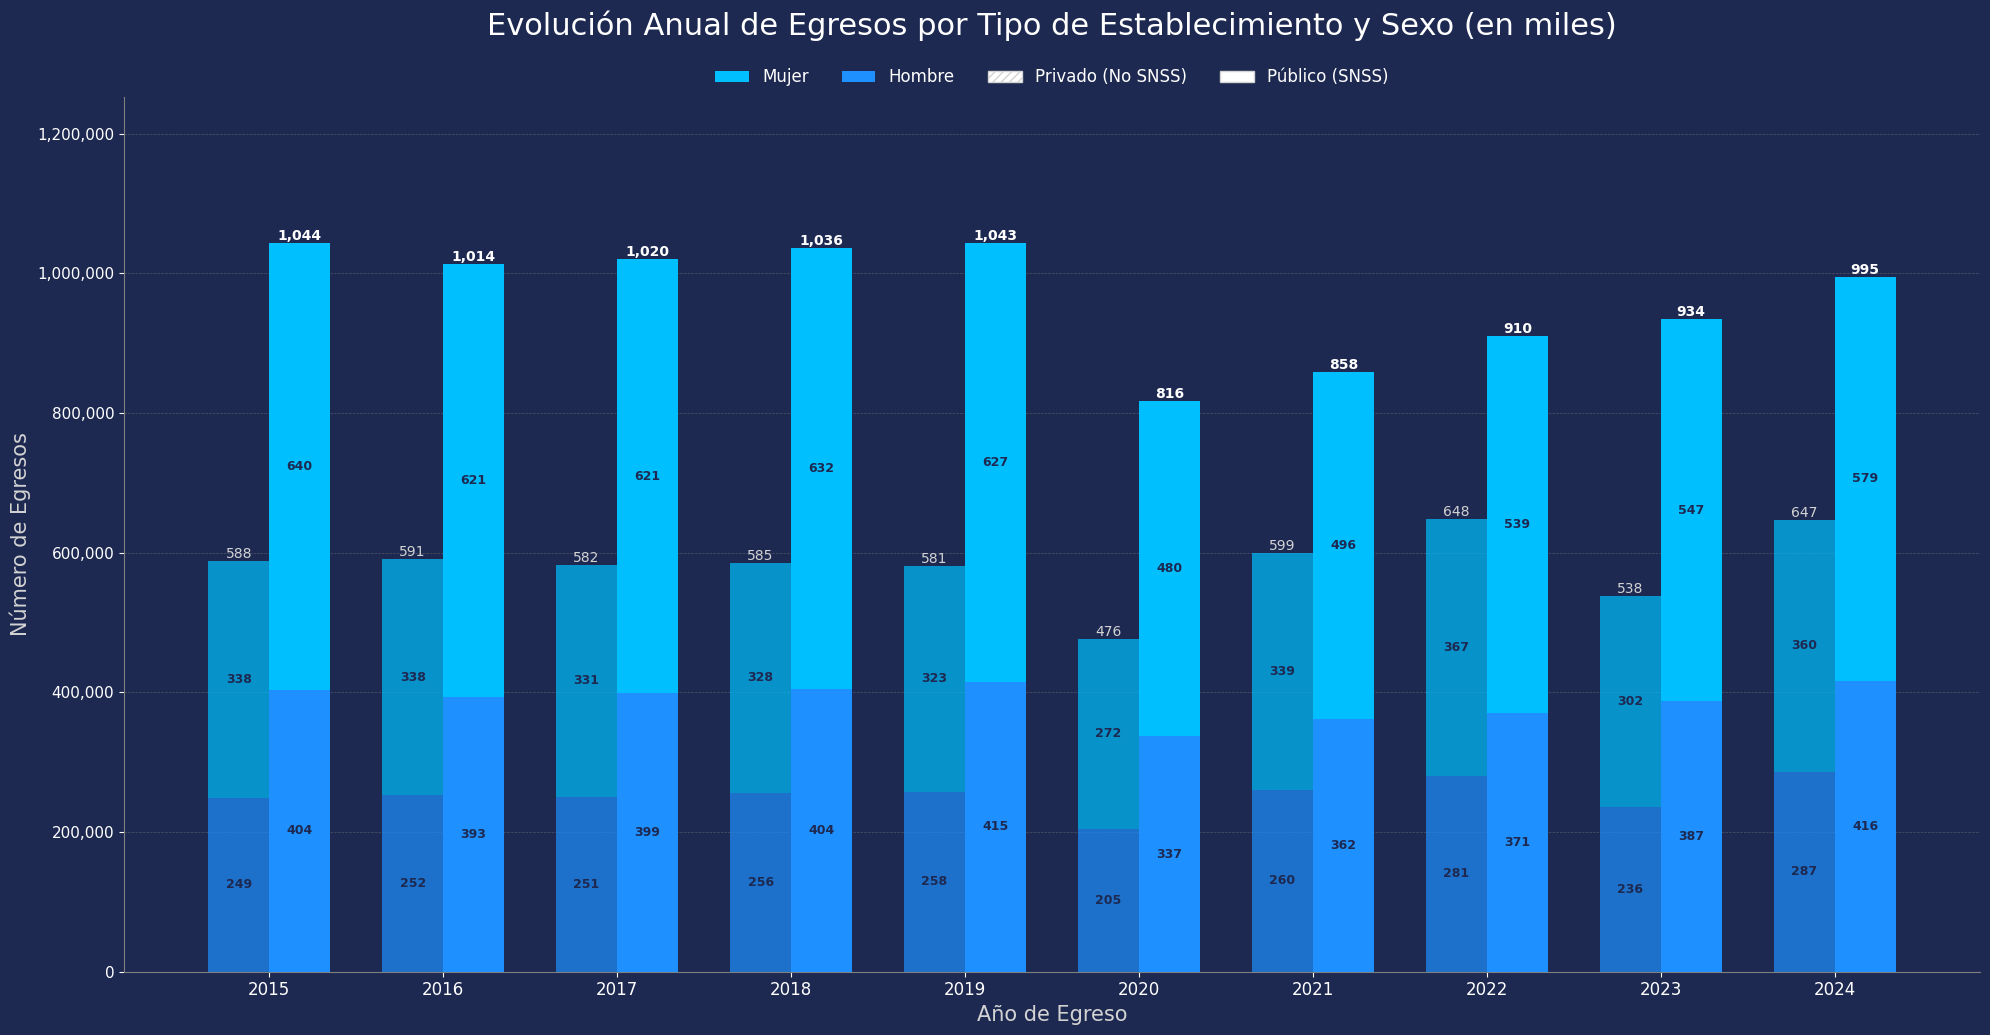

In [19]:
def graficar_evolucion_egresos(dataframe):
    # Agrupación de datos
    df = dataframe.copy()
    datos_grafico = df.groupby(['ANO_EGRESO', 'PERTENECE_SNSS', 'SEXO']).size().unstack(level='SEXO').fillna(0)
    if 'Hombre' in datos_grafico.columns and 'Mujer' in datos_grafico.columns:
        datos_grafico = datos_grafico[['Hombre', 'Mujer']]

    # Figura
    labels = sorted(datos_grafico.index.get_level_values('ANO_EGRESO').unique())
    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots(figsize=(20, 11))

    # Colores
    color_hombre = color_azul_1
    color_mujer = color_azul_2
    color_spines = color_gris_1

    fig.set_facecolor(color_fondo)
    ax.set_facecolor(color_fondo)
    
    # Datos para cada barra
    egresos_si = datos_grafico.xs('Si', level='PERTENECE_SNSS').reindex(labels, fill_value=0)
    egresos_no = datos_grafico.xs('No', level='PERTENECE_SNSS').reindex(labels, fill_value=0)
    
    # Barra: Privado
    bars_no_h = ax.bar(x - width/2, egresos_no['Hombre'], width, label='Hombre (Privado)', color=color_hombre, alpha=0.7)
    bars_no_m = ax.bar(x - width/2, egresos_no['Mujer'], width, bottom=egresos_no['Hombre'], label='Mujer (Privado)', color=color_mujer, alpha=0.7)
    # Barra: Público
    bars_si_h = ax.bar(x + width/2, egresos_si['Hombre'], width, label='Hombre (Público)', color=color_hombre)
    bars_si_m = ax.bar(x + width/2, egresos_si['Mujer'], width, bottom=egresos_si['Hombre'], label='Mujer (Público)', color=color_mujer)

    # Títulos, Etiquetas y Ejes
    ax.set_title('Evolución Anual de Egresos por Tipo de Establecimiento y Sexo (en miles)', color=color_texto, fontsize=22, pad=45)
    ax.set_ylabel('Número de Egresos', color=color_gris_2, fontsize=15)
    ax.set_xlabel('Año de Egreso', color=color_gris_2, fontsize=15)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.tick_params(axis='x', colors=color_texto, rotation=0, labelsize=12)
    ax.tick_params(axis='y', colors=color_texto, labelsize=11)
    ax.get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda y, p: f'{int(y):,}'))
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(color_spines)
    ax.spines['bottom'].set_color(color_spines)

    # Leyenda
    from matplotlib.patches import Patch
    legend_elements = [
        Patch(facecolor=color_mujer, label='Mujer'),
        Patch(facecolor=color_hombre, label='Hombre'),
        Patch(facecolor='white', hatch='////', edgecolor=color_gris_2, label='Privado (No SNSS)'),
        Patch(facecolor='white', edgecolor=color_gris_2, label='Público (SNSS)')
    ]
    legend = ax.legend(
        handles=legend_elements,
        fontsize=12,
        frameon=False,
        loc='upper center',
        bbox_to_anchor=(0.5, 1.05),
        ncol=4
    )
    for text in legend.get_texts():
        text.set_color(color_texto)
    
    # Etiquetas para cada segmento
    for bar_container in [bars_no_h, bars_no_m, bars_si_h, bars_si_m]:
        ax.bar_label(
            bar_container, 
            labels=[format_label(v) for v in bar_container.datavalues],
            label_type='center',
            color=color_fondo,
            fontsize=9,
            fontweight='bold'
        )
    
    # Etiquetas para el total de cada barra
    totals_si = egresos_si.sum(axis=1)
    totals_no = egresos_no.sum(axis=1)
    
    for i, year in enumerate(x):
        # Total para la barra de la izquierda (No SNSS)
        total_no = totals_no[labels[i]]
        ax.text(year - width/2, total_no, format_label(total_no), ha='center', va='bottom', color=color_gris_2, fontsize=10)
        
        # Total para la barra de la derecha (Si SNSS)
        total_si = totals_si[labels[i]]
        ax.text(year + width/2, total_si, format_label(total_si), ha='center', va='bottom', color=color_texto, fontsize=10, fontweight='bold')
    
    max_y = max(totals_si.max(), totals_no.max())
    ax.set_ylim(0, max_y * 1.20)
    ax.grid(axis='y', color=color_spines, linestyle='--', linewidth=0.5, alpha=0.5)
    ax.set_axisbelow(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig("graphics/evolucion_snss_sexo_etiquetas.png", facecolor=color_fondo, bbox_inches='tight')
    plt.show()

graficar_evolucion_egresos(dfc)

Se puede observar con claridad la disminución general de los egresos hospitalarios durante el periodo 2020, correspondiente al año de mayor impacto de la pandemia de COVID-19. La cantidad total de egresos probablemente disminuyó debido a una combinación de factores del sistema de salud y cambios en el comportamiento de los pacientes, un fenómeno observado a nivel mundial. Factores como la reconfiguración y estrés del sistema de salud, cambios en el comportamiento de los pacientes y el impacto de las medidas de salud pública son las causas principales del cambio en el comportamiento de los egresos hospitalarios a lo largo de todo el sistema de salud nacional. Es muy importante considerar este comportemiento general al momento de estudiar la evolución de las distintos diagnósticos de hospitalización, de esta forma se podrá confirmar si las variaciones individuales están vinculadas a este fenómeno o si corresponden a conducta adjudicable a la causa de hospitalización estudiada.

### **G2**: Principales capítulos de diagnóstico
El siguiente gráfico muestra la cantidad de egresos correspondientes a cada ***Capítulo de Diagnóstico*** agrupado por ***Sexo*** con el objetivo de tener una idea general de la distribución de las principales causas de hospitalización y así, identificar que lugar ocupan las enfermedades del sistema circulatorio y las endocrinas, nutricionales y metabólicas, capítulos en los que se encuentran las morbilidades objetivo.

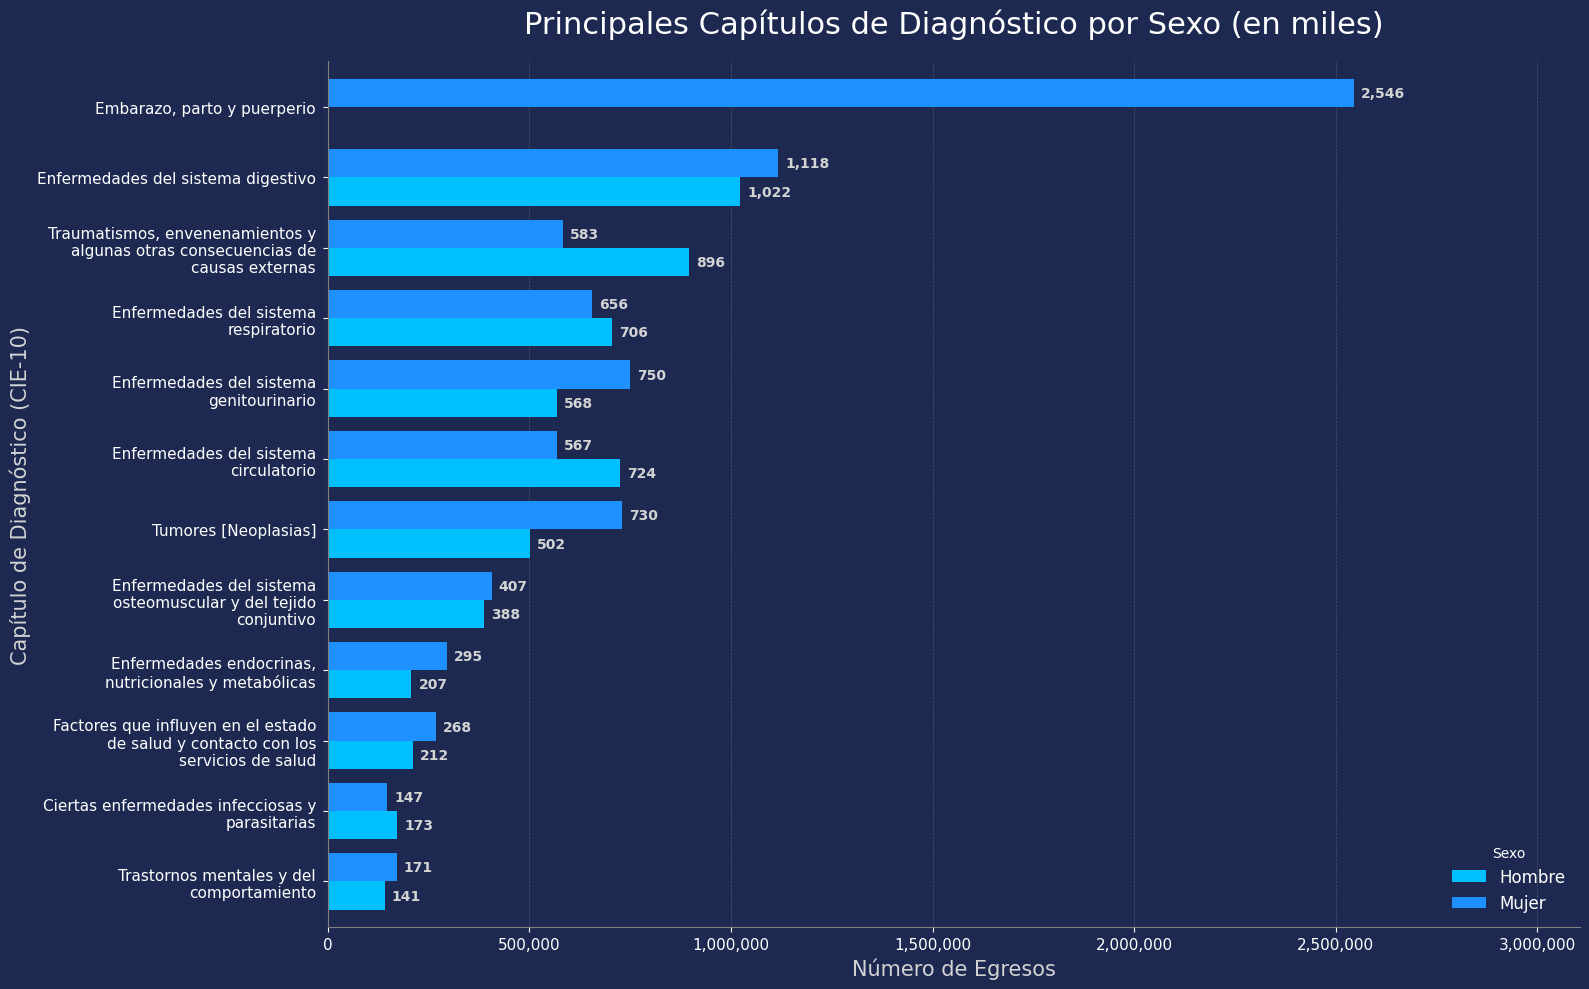

In [20]:
def graficar_top_capitulos_por_sexo(dataframe, top_n=10):
    # Agrupación de datos
    df = dataframe.copy()
    top_capitulos = df['CAPITULO_DIAG1'].value_counts().nlargest(top_n).index
    df_top = df[df['CAPITULO_DIAG1'].isin(top_capitulos)]
    datos_grafico = df_top.groupby(['CAPITULO_DIAG1', 'SEXO']).size().unstack(level='SEXO').fillna(0)
    datos_grafico['Total'] = datos_grafico.sum(axis=1)
    datos_grafico.sort_values('Total', ascending=True, inplace=True)
    datos_grafico.drop(columns='Total', inplace=True)

    # Figura
    fig, ax = plt.subplots(figsize=(16, 10))

    # Colores
    colores_barras = [color_azul_2, color_azul_1]
    color_spines = color_gris_1

    fig.set_facecolor(color_fondo)
    ax.set_facecolor(color_fondo)
    datos_grafico.plot(kind='barh', ax=ax, color=colores_barras, width=0.8)

    # Títulos y Etiquetas
    ax.set_title(f'Principales Capítulos de Diagnóstico por Sexo (en miles)', color=color_texto, fontsize=22, pad=20)
    ax.set_xlabel('Número de Egresos', color=color_gris_2, fontsize=15)
    ax.set_ylabel('Capítulo de Diagnóstico (CIE-10)', color=color_gris_2, fontsize=15)

    # Ejes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(color_spines)
    ax.spines['bottom'].set_color(color_spines)
    ax.tick_params(axis='x', colors=color_texto, labelsize=11)

    # Etiquetas del eje Y
    max_width = 35 
    wrapped_labels = ['\n'.join(textwrap.wrap(label, max_width)) for label in datos_grafico.index]
    ax.set_yticklabels(wrapped_labels)
    ax.tick_params(axis='y', colors=color_texto, labelsize=11, pad=5)
    ax.get_xaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Leyenda
    legend = ax.legend(title='Sexo', fontsize=12, frameon=False, loc='lower right')
    legend.get_title().set_color(color_texto)
    for text in legend.get_texts():
        text.set_color(color_texto)

    # Etiquetas de Datos
    for container in ax.containers:
        ax.bar_label(
            container,
            labels=[format_label(v) for v in container.datavalues],
            label_type='edge',
            padding=5,
            color=color_gris_2,
            fontsize=10,
            fontweight='bold'
        )
    
    max_x = datos_grafico.max().max()
    ax.set_xlim(0, max_x * 1.22) # Espacio extra para etiquetas

    ax.grid(axis='x', color=color_spines, linestyle='--', linewidth=0.5, alpha=0.5)
    ax.set_axisbelow(True)

    plt.tight_layout()
    plt.savefig("graphics/top_capitulos_diagnostico_sexo.png", facecolor=color_fondo, bbox_inches='tight')
    plt.show()

graficar_top_capitulos_por_sexo(dfc, top_n=12)

### **G3**: Principales grupos de diagnósticos dentro de las Enfermedades del Sistema Circulatorio
Los siguientes gráficos muestran, en orden descendente, los principales ***Grupos de diagnóstico*** para las **Enfermedades del Sistema Circulatorio**, categoría en la que se encuentran las enfermedades hipertensivas, y las **Enfermedades Endocrinas, Nutricionales y Metabólicas**, grupo de diagnóstico que contiene la categoría Diabetes Mellitus. Se mantiene el sexo, como la principal variable diferenciadora.

In [37]:
def graficar_top_grupos_por_sexo(dataframe, grupo_diag, top_n=10):
    # Agrupacion datos
    df = dataframe.copy()
    df = df[df['CAPITULO_DIAG1'] == grupo_diag]
    top_grupos = df['GRUPO_DIAG1'].value_counts().nlargest(top_n).index
    df_top = df[df['GRUPO_DIAG1'].isin(top_grupos)]
    df_grafico = df_top.groupby(['GRUPO_DIAG1', 'SEXO']).size().unstack(level='SEXO').fillna(0)
    df_grafico['Total'] = df_grafico.sum(axis=1)
    df_grafico.sort_values('Total', ascending=True, inplace=True)
    df_grafico.drop(columns='Total', inplace=True)

    fig, ax = plt.subplots(figsize=(16, 10))

    colores_barras = [color_azul_2, color_azul_1]  # Mujer, Hombre
    color_spines = color_gris_1

    fig.set_facecolor(color_fondo)
    ax.set_facecolor(color_fondo)
    df_grafico.plot(kind='barh', ax=ax, color=colores_barras, width=0.8)

    # Títulos y Etiquetas
    ax.set_title(f'Principales Grupos de Diagnóstico por Sexo (en miles):\n{grupo_diag.title()}', color=color_texto, fontsize=22, pad=20)
    ax.set_xlabel('Número de Egresos', color=color_gris_2, fontsize=15)
    ax.set_ylabel('Capítulo de Diagnóstico (CIE-10)', color=color_gris_2, fontsize=15)

    # Ejes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(color_spines)
    ax.spines['bottom'].set_color(color_spines)
    ax.tick_params(axis='x', colors=color_texto, labelsize=11)
    
    # Leyenda eje Y
    max_width = 25 
    wrapped_labels = ['\n'.join(textwrap.wrap(label, max_width)) for label in df_grafico.index]
    ax.set_yticklabels(wrapped_labels)
    ax.tick_params(axis='y', colors=color_texto, labelsize=11, pad=5)
    ax.get_xaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Leyenda
    legend = ax.legend(title='Sexo', fontsize=12, frameon=False, loc='lower right')
    legend.get_title().set_color(color_texto)
    for text in legend.get_texts():
        text.set_color(color_texto)

    # Etiquetas de Datos
    for container in ax.containers:
        ax.bar_label(
            container,
            labels=[format_label(v) for v in container.datavalues],
            label_type='edge',
            padding=5,
            color=color_gris_2,
            fontsize=10,
            fontweight='bold'
        )
    
    max_x = df_grafico.max().max()
    ax.set_xlim(0, max_x * 1.22)

    ax.grid(axis='x', color=color_spines, linestyle='--', linewidth=0.5, alpha=0.5)
    ax.set_axisbelow(True)

    plt.tight_layout()
    plt.savefig(f"graphics/top_grupos_diagnostico_sexo_{grupo_diag.replace(' ', '_').lower()}.png", facecolor=color_fondo, bbox_inches='tight')
    plt.show()

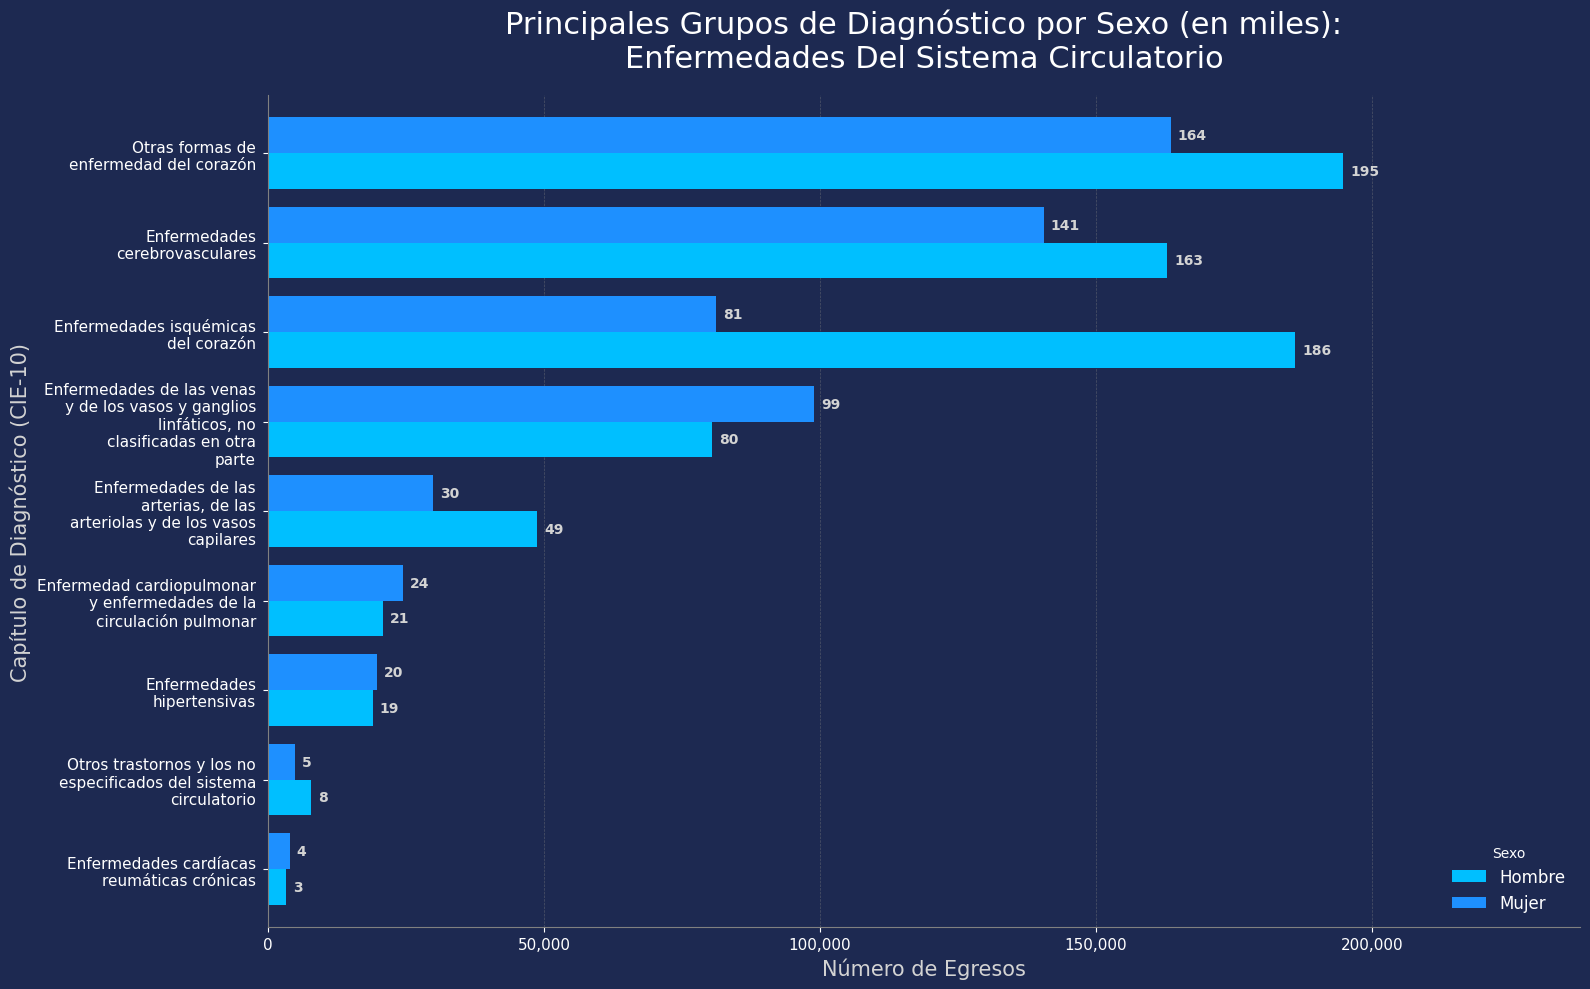

In [38]:
graficar_top_grupos_por_sexo(dfc, 'Enfermedades del sistema circulatorio', top_n=9)

### Principales grupos de diagnósticos dentro de las Enfermedades Endocrinas, Nutricionales y Metabólicas

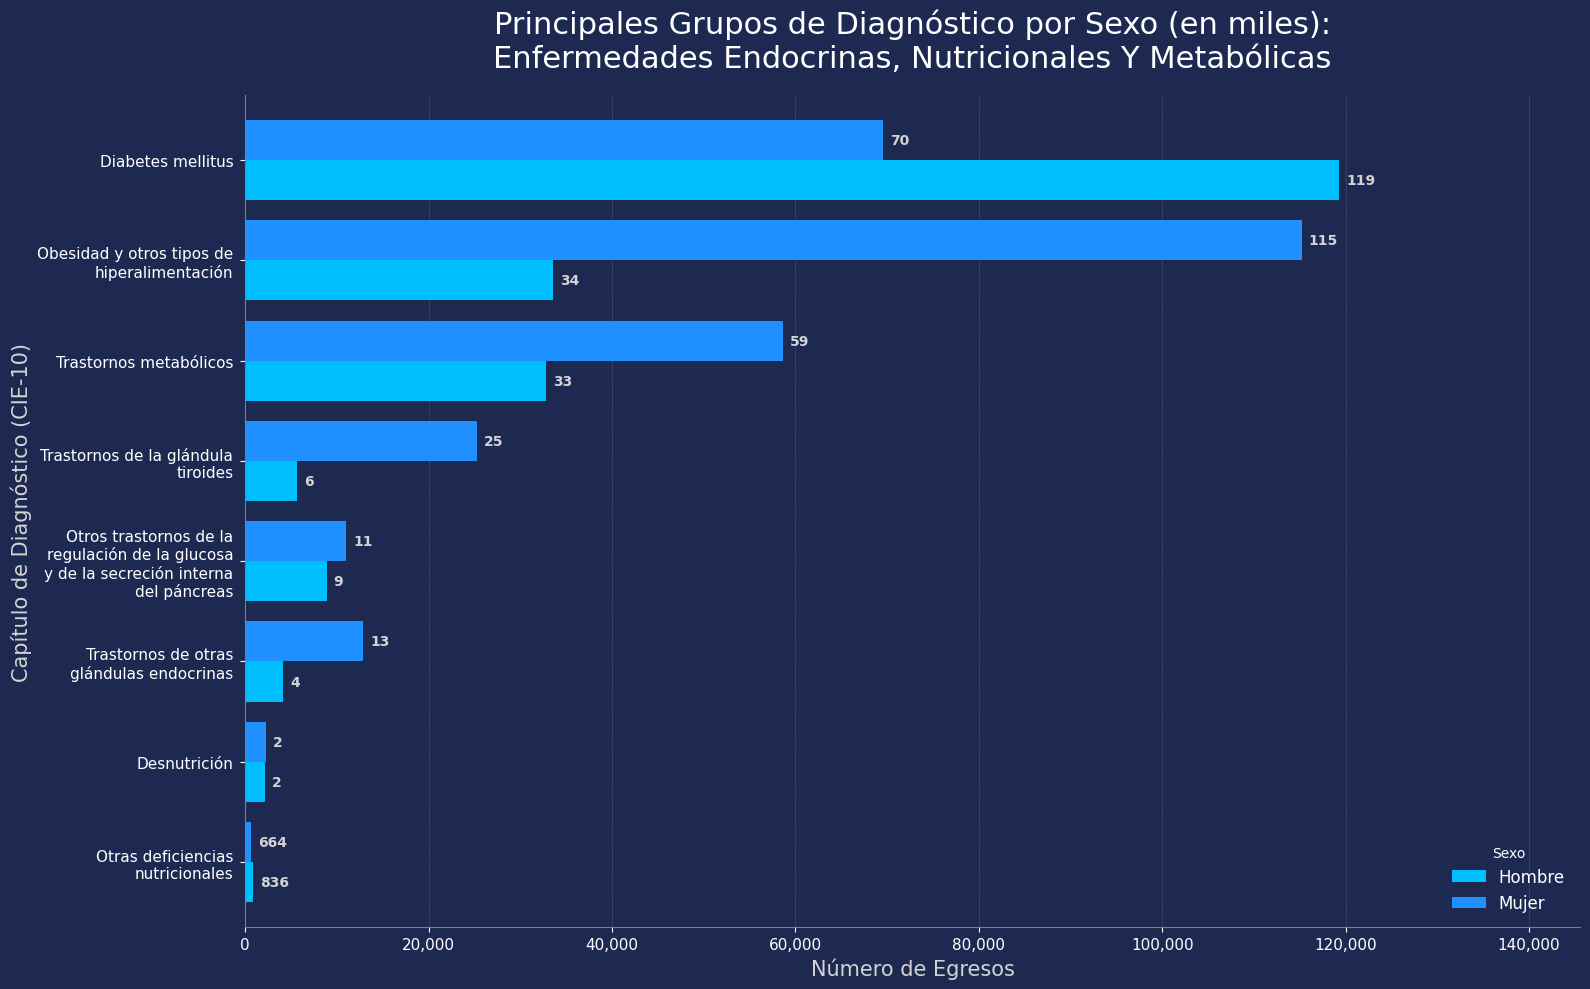

In [39]:
graficar_top_grupos_por_sexo(dfc, 'Enfermedades endocrinas, nutricionales y metabólicas', top_n=8)

## 3.2. Análisis de Tendencias Temporales
---

### **G4**: Tendencia Anual de Egresos por Diabetes e Hipertensión.
Este es uno de los gráficos más importantes; muestra la evolución de la frecuencia hospitalaria para los casos diagnósticados con **Diabetes Mellitus** e **Hipertensión**. A simple vista es evidente la predominancia de los casos de **Diabetes**, que además, muestra un comportamiento más variables y que, claramente, va al alza desde el año 2020. Además, se puede observar una reacción importante al contexto de pandemia en la cantidad de hospitalizaciones de este primera enfermedad. Por otro lado, las hospitalizaciones por **Hipertensión** se muestran más estables durante los últimos 10 años, sin una caída significativa durante el año 2020, de lo que podemos inferir, esta diferencia tiene que ver con un nivel de gravedad superior de las hospitalizaciones con este diagnóstico en comparación a los casos de **Diabetes**. A lo largo de estos 10 años, se registra una caída total de 600 hospitalizaciones anuales.

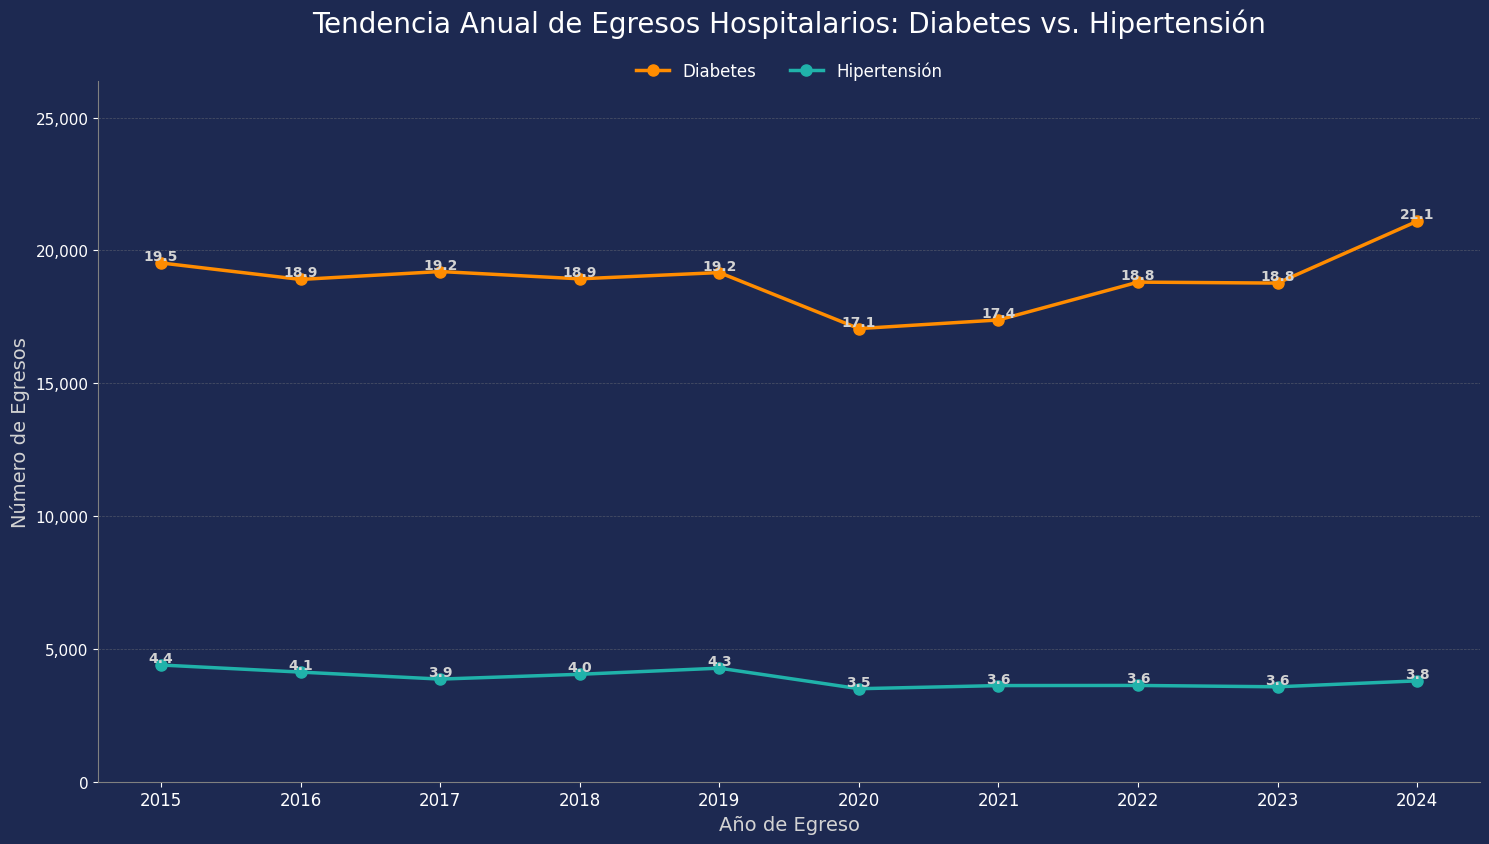

In [29]:
def graficar_tendencia_dm_ht(dataframe):
    # Agrupación Datos
    df = dataframe.copy()
    df['ANO_EGRESO'] = pd.to_numeric(df['ANO_EGRESO'], errors='coerce')
    df_calc = df.dropna(subset=['ANO_EGRESO', 'GRUPO_DIAG1'])
    df_diabetes = df_calc[df_calc['GRUPO_DIAG1'] == "Diabetes mellitus"]
    conteo_diabetes = df_diabetes['ANO_EGRESO'].value_counts()
    df_hipertension = df_calc[df_calc['GRUPO_DIAG1'] == "Enfermedades hipertensivas"]
    conteo_hipertension = df_hipertension['ANO_EGRESO'].value_counts()
    datos_grafico = pd.DataFrame({
        'Diabetes': conteo_diabetes,
        'Hipertensión': conteo_hipertension
    })
    datos_grafico.sort_index(inplace=True)
    datos_grafico.fillna(0, inplace=True)
    
    fig, ax = plt.subplots(figsize=(15, 9))

    # Colores
    colores_lineas = [
        color_naranjo_1,   # Diabetes
        color_verde_1      # Hipertensión
    ] 
    color_spines = color_gris_1

    fig.set_facecolor(color_fondo)
    ax.set_facecolor(color_fondo)

    # Se crea el gráfico
    datos_grafico.plot(
        kind='line', 
        ax=ax, 
        color=colores_lineas, 
        marker='o', 
        linestyle='-',
        linewidth=2.5,
        markersize=8
    )

    # Títulos y Etiquetas
    ax.set_title('Tendencia Anual de Egresos Hospitalarios: Diabetes vs. Hipertensión', color=color_texto, fontsize=20, pad=35)
    ax.set_ylabel('Número de Egresos', color=color_gris_2, fontsize=14)
    ax.set_xlabel('Año de Egreso', color=color_gris_2, fontsize=14)

    # Ejes y Leyenda
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(color_spines)
    ax.spines['bottom'].set_color(color_spines)
    ax.tick_params(axis='x', colors=color_texto, rotation=0, labelsize=12)
    ax.tick_params(axis='y', colors=color_texto, labelsize=11)
    ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    plt.xticks(datos_grafico.index)
    ax.get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    legend = ax.legend(fontsize=12, frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)
    for text in legend.get_texts():
        text.set_color(color_texto)
        
    # Etiquetas de Datos
    for line_name in datos_grafico.columns:
        for year, value in datos_grafico[line_name].items():
            if pd.notna(value) and value > 0:
                label = f'{value/1000:.1f}'
                ax.text(year, value, label, ha='center', va='bottom', color=color_gris_2, fontsize=10, fontweight='bold')

    # Límite y grilla
    max_y = datos_grafico.max().max()
    ax.set_ylim(0, max_y * 1.25)
    ax.grid(axis='y', color=color_spines, linestyle='--', linewidth=0.5, alpha=0.5)
    ax.set_axisbelow(True)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig("graphics/tendencia_anual_dm_hta.png", facecolor=color_fondo, bbox_inches='tight')
    plt.show()
    
graficar_tendencia_dm_ht(dfc)

### **G5:** Evolución de la Estadía Hospitalaria Promedio.
Analizando el siguiente gráfico y asumiendo que la eficiencia hospitalaria, por lo menos, se ha mantenido durante estos 10 años, se puede observar un aumento considerable en la complejidad de los casos de **Hipertensión**, que creció a un ritmo estable hasta el año 2023. Para el caso de la **Diabetes**, nuevamente destaca el efecto que tuvo la pandemia durante el año 2020. El año 2023 parece constituir un punto de inflexión en la severidad hospitalaria, ya que luego de este periodo se observa un decaímiento importante que corresponde al valor mínimo alcanzado durante el periodo estudiado.

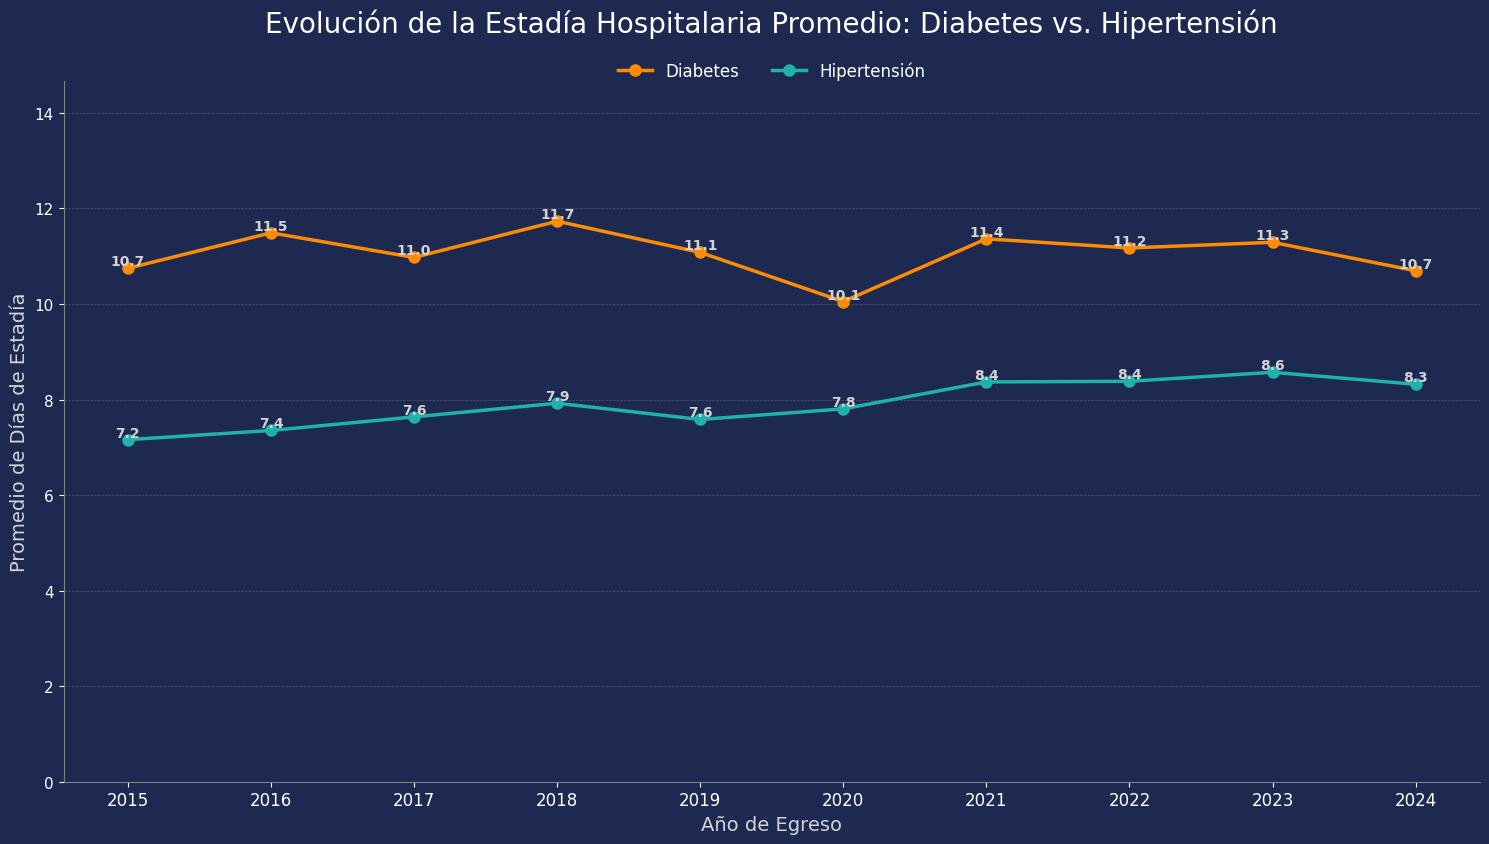

In [30]:
def graficar_tendencia_estadia_promedio(dataframe):
    # Agrupación Datos
    df = dataframe.copy()
    df['ANO_EGRESO'] = pd.to_numeric(df['ANO_EGRESO'], errors='coerce')
    df_calc = df.dropna(subset=['ANO_EGRESO', 'GRUPO_DIAG1'])
    df_diabetes = df_calc[df_calc['GRUPO_DIAG1'] == "Diabetes mellitus"]
    promedio_diabetes = df_diabetes.groupby('ANO_EGRESO')['DIAS_ESTADIA'].mean()
    df_hipertension = df_calc[df_calc['GRUPO_DIAG1'] == "Enfermedades hipertensivas"]
    promedio_hipertension = df_hipertension.groupby('ANO_EGRESO')['DIAS_ESTADIA'].mean()
    datos_grafico = pd.DataFrame({
        'Diabetes': promedio_diabetes,
        'Hipertensión': promedio_hipertension
    })
    datos_grafico.sort_index(inplace=True)
    datos_grafico.fillna(0, inplace=True)
    
    fig, ax = plt.subplots(figsize=(15, 9))

    # Colores
    colores_lineas = [
        color_naranjo_1, # Diabetes
        color_verde_1    # Hipertensión
    ] 
    color_spines = color_gris_1

    fig.set_facecolor(color_fondo)
    ax.set_facecolor(color_fondo)

    # Se crea el gráfico
    datos_grafico.plot(
        kind='line', 
        ax=ax, 
        color=colores_lineas, 
        marker='o', 
        linestyle='-',
        linewidth=2.5,
        markersize=8
    )

    # Títulos y Etiquetas
    ax.set_title('Evolución de la Estadía Hospitalaria Promedio: Diabetes vs. Hipertensión', color=color_texto, fontsize=20, pad=35)
    ax.set_ylabel('Promedio de Días de Estadía', color=color_gris_2, fontsize=14)
    ax.set_xlabel('Año de Egreso', color=color_gris_2, fontsize=14)

    # Ejes y Leyenda
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(color_spines)
    ax.spines['bottom'].set_color(color_spines)
    ax.tick_params(axis='x', colors=color_texto, rotation=0, labelsize=12)
    ax.tick_params(axis='y', colors=color_texto, labelsize=11)
    ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    plt.xticks(datos_grafico.index)
    ax.get_yaxis().set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    legend = ax.legend(fontsize=12, frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)
    for text in legend.get_texts():
        text.set_color(color_texto)
        
    # Etiquetas de Datos
    for line_name in datos_grafico.columns:
        for year, value in datos_grafico[line_name].items():
            if pd.notna(value) and value > 0:
                label = f'{value:.1f}'
                ax.text(year, value, label, ha='center', va='bottom', color=color_gris_2, fontsize=10, fontweight='bold')

    # Límite y grilla
    max_y = datos_grafico.max().max()
    ax.set_ylim(0, max_y * 1.25)
    ax.grid(axis='y', color=color_spines, linestyle='--', linewidth=0.5, alpha=0.5)
    ax.set_axisbelow(True)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig("graphics/evolucion_estadia_anual_dm_hta.png", facecolor=color_fondo, bbox_inches='tight')
    plt.show()
    
graficar_tendencia_estadia_promedio(dfc)

## 3.2. Análisis Demográfico
---

### **G6:** Pirámide Poblacional de Egresos Hospitalarios
Los siguientes gráficos corresponden a la herramienta clásica y más poderosa para visualizar la distribución de una enfermedad por edad y sexo simultáneamente. En este caso muestran el riesgo o propensión a requerir asistencia médica intensiva asociado a cada grupo etario y sexo.
- **Diabetes**: el grupo etario de mayor riesgo corresponde al de 60 a 69 años tanto en hombres como en mujeres, siendo el riesgo para los hombres el doble que su contraparte para todos los grupos etarios. Para las personas de 50 a 59 años y 70 a 79 existe un riesgo significativamente superior al resto de los grupos etarios, duplicando los casos de hospitalización. Esto se ve especialmente resaltado para hombres.
- **Hipertensión**: en el caso de las mujeres, el riesgo aumenta de manera exponencial con la edad, llegando a su máximo en el último grupo etario registrado: mayores de 80 años. Para los hombres, entre los 60 y 79 se alcanza el máximo riesgo de hospitalización, disminuyendo significativamente bajo los 50 años.

In [31]:
def graficar_piramide_poblacional(dataframe, grupo_diag):
    #  Agrupación de los datos
    df = dataframe.copy()
    df_enf = df[df['GRUPO_DIAG1'] == grupo_diag]
    datos_grafico = df_enf.groupby(['GRUPO_EDAD', 'SEXO']).size().unstack(level='SEXO').fillna(0)
    orden_edades = [
        '<1 año', '1-9 años', '10-19 años', '20-29 años', '30-39 años', 
        '40-49 años', '50-59 años', '60-69 años', '70-79 años', '80+ años'
    ]
    datos_grafico = datos_grafico.reindex(orden_edades).fillna(0) 
    datos_grafico['Hombre'] = datos_grafico['Hombre'] * -1

    fig, ax = plt.subplots(figsize=(14, 8))

    # Colores
    color_mujer = color_azul_2
    color_hombre = color_azul_1
    color_spines = color_gris_1

    fig.set_facecolor(color_fondo)
    ax.set_facecolor(color_fondo)

    # Se crea el gráfico
    bar_mujer = ax.barh(datos_grafico.index, datos_grafico['Mujer'], color=color_mujer, label='Mujer')
    bar_hombre = ax.barh(datos_grafico.index, datos_grafico['Hombre'], color=color_hombre, label='Hombre')

    # Títulos y Etiquetas
    ax.set_title(f'Pirámide Poblacional de Egresos por {grupo_diag.title()}', color=color_texto, fontsize=20, pad=35)
    ax.set_xlabel('Número de Egresos', color=color_gris_2, fontsize=14)
    ax.set_ylabel('Grupo de Edad', color=color_gris_2, fontsize=14)

    # Ejes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(color_spines)
    ax.spines['bottom'].set_color(color_spines)
    ax.tick_params(axis='x', colors=color_texto, labelsize=11)
    ax.tick_params(axis='y', colors=color_texto, labelsize=12)
    # Eje X debe mostrar números positivos en ambos lados
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f'{abs(x):,.0f}'))
    ax.axvline(0, color=color_gris_2, linewidth=0.8)

    # Etiquetas de Datos
    ax.bar_label(bar_mujer, labels=[f'{abs(v):,}' for v in bar_mujer.datavalues], label_type='edge', padding=5, color=color_gris_2, fontsize=9)
    ax.bar_label(bar_hombre, labels=[f'{abs(v):,}' for v in bar_hombre.datavalues], label_type='edge', padding=5, color=color_gris_2, fontsize=9)
    max_val = max(abs(datos_grafico['Hombre'].min()), datos_grafico['Mujer'].max())
    ax.set_xlim(-max_val * 1.15, max_val * 1.15)
    
    # Leyenda y Grilla
    handles, labels = ax.get_legend_handles_labels()
    reversed_handles = handles[::-1]
    reversed_labels = labels[::-1]
    legend = ax.legend(reversed_handles, reversed_labels, frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2, fontsize=12)
    for text in legend.get_texts():
        text.set_color(color_texto)

    ax.grid(axis='x', color=color_spines, linestyle='--', linewidth=0.5, alpha=0.5)
    ax.set_axisbelow(True)

    plt.tight_layout(rect=[0, 0.05, 1, 1])
    plt.savefig(f"graphics/piramide_{grupo_diag.replace(' ', '_').lower()}.png", facecolor=color_fondo, bbox_inches='tight')
    plt.show()

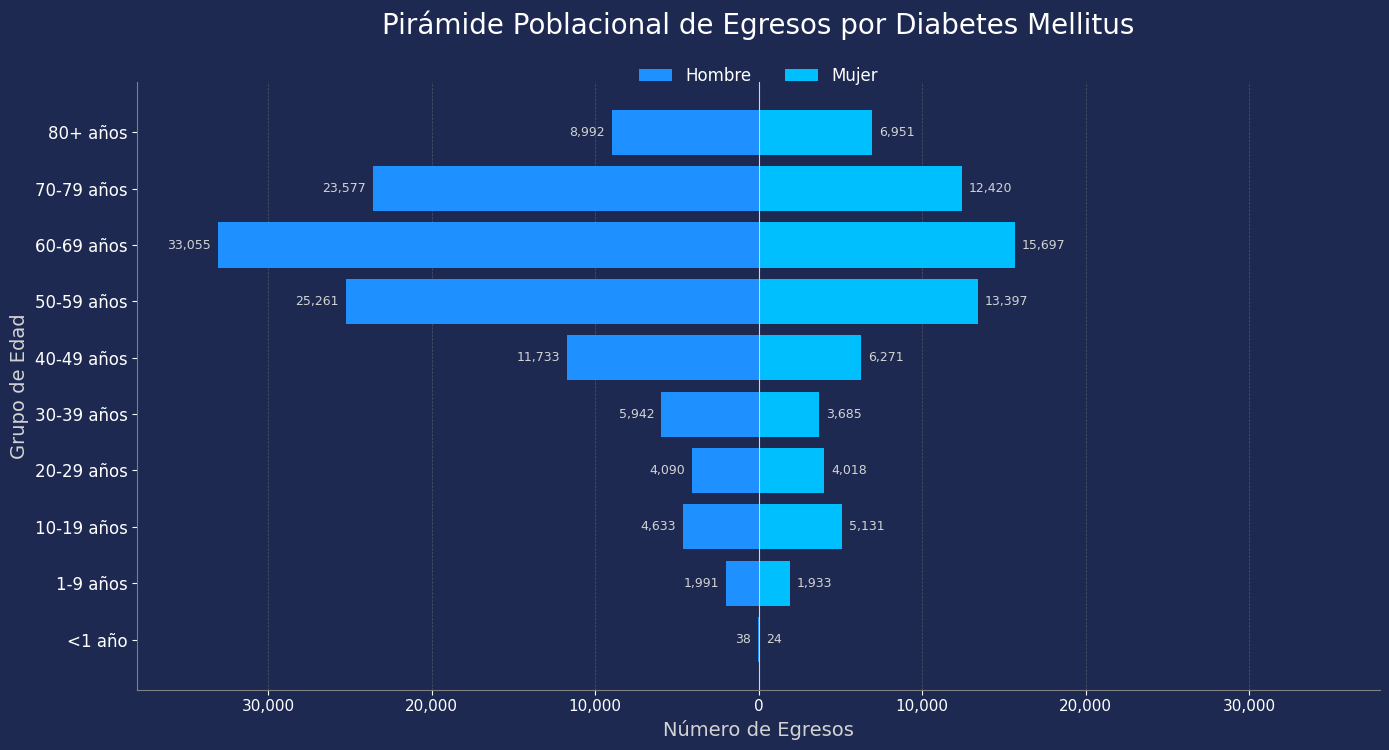

In [32]:
graficar_piramide_poblacional(dfc, "Diabetes mellitus")

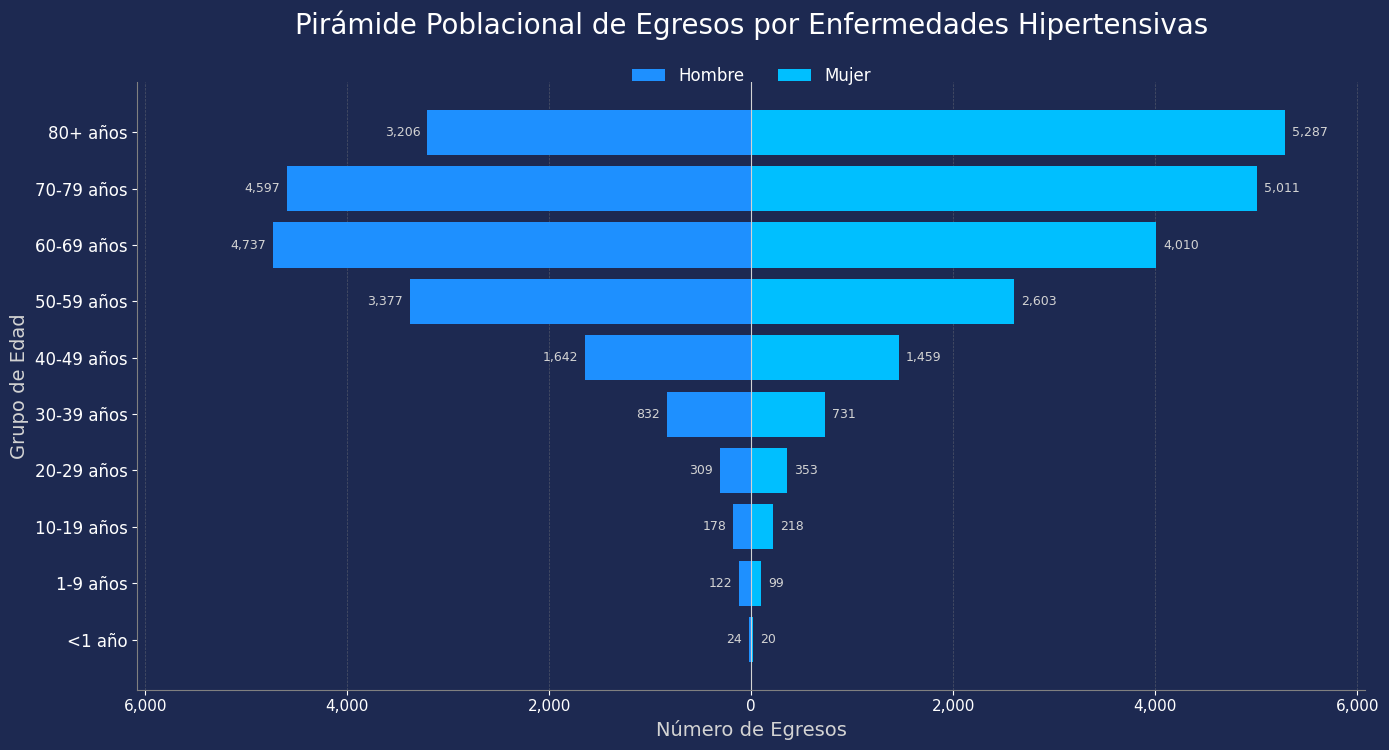

In [34]:
graficar_piramide_poblacional(dfc, 'Enfermedades hipertensivas')

## 3.3. Análisis Geográfico
---

### **G7:** Distribución Regional de Egresos Hospitalarios
En los siguientes gráficos se busca obtener una lectura de la distribución geográfica de los casos de hospitalización para cada enfermedad estudiada. Si bien, no se considera la densidad poblacional de los territorios, se puede identificar la demanda absoluta de cuidados intensivos y hospitalización para cada región, información muy relevante para una alocación de recursos hospitalarios específicos efectiva.
- Para el caso de la Diabetes Mellitus se pueden identificar 5 categorías principales:
    - 1er Orden (6.500 hospitalizaciones anuales) - Región Metropolitana.
    - 2do Orden (2.100 hospitalizaciones anuales) - Regiones de Valparaíso y Bio-Bio.
    - 3er Orden (1.200 hospitalizaciones anuales) - Regiones del Libertador B. O'Higgins, del Maule, de la Araucanía y de Los Lagos.
    - 4to Orden (6.400 hospitalizaciones anuales) - Regiones de Antofagasta, de Coquimbo, de Ñuble y de los Ríos.
    - 5to Orden (3.200 hospitalizaciones anuales) - Regiones de Arica y Parinacota, de Tarapacá, de Atacama, de Aisén y de Magallanes.
  <br>

- En el caso de la Hipertensión se pueden identificar las siguientes categorías:
    - 1er Orden (1.100 hospitalizaciones anuales) - Región Metropolitana.
    - 2do Orden (500 hospitalizaciones anuales)   - Regiones de Valparaíso.
    - 3er Orden (360 hospitalizaciones anuales)   - Regiones del Maule, del Bio-Bio, de la Araucanía y de Los Lagos.
    - 4to Orden (160 hospitalizaciones anuales)   - Regiones de Antofagasta, de Coquimbo, del Libertador B. O'Higgins y de los Ríos.
    - 5to Orden (50 hospitalizaciones anuales) - Regiones de Arica y Parinacota, de Tarapacá, de Atacama, de Ñubles, de Aisén y de Magallanes.

In [43]:
def graficar_distribucion_regional(dataframe, grupo_diag):
    # Agrupación datos
    df = dataframe.copy()
    df = df[df['GRUPO_DIAG1'] == grupo_diag]
    orden_regiones = [
        'De Arica y Parinacota',
        'De Tarapacá',
        'De Antofagasta',
        'De Atacama',
        'De Coquimbo',
        'De Valparaíso',
        'Metropolitana de Santiago',
        "Del Libertador B. O'Higgins",
        'Del Maule',
        'De Ñuble',
        'Del Bíobío',
        'De La Araucanía',
        'De Los Ríos',
        'De Los Lagos',
        'De Aisén del Gral. C. Ibáñez del Campo',
        'De Magallanes y de La Antártica Chilena'
    ]
    datos_grafico = df.groupby(['REGION_RESIDENCIA', 'SEXO']).size().unstack(level='SEXO').fillna(0)
    regiones_presentes_en_orden = [region for region in orden_regiones if region in datos_grafico.index]
    datos_grafico = datos_grafico.reindex(regiones_presentes_en_orden)
        
    fig, ax = plt.subplots(figsize=(16, 12))

    # Colores
    colores_barras = [color_azul_2, color_azul_1]  # Mujer, Hombre
    color_gris_suave = color_gris_2
    color_spines = color_gris_1

    fig.set_facecolor(color_fondo)
    ax.set_facecolor(color_fondo)

    # Crear el gráfico de barras horizontales apiladas
    datos_grafico.plot(kind='barh', stacked=True, ax=ax, color=colores_barras, width=0.8)
    ax.invert_yaxis()

    # Títulos y Etiquetas
    ax.set_title(f'Distribución Regional de Egresos Hospitalarios:\n{grupo_diag.title()}', color=color_texto, fontsize=22, pad=35)
    ax.set_xlabel('Número de Egresos', color=color_gris_suave, fontsize=15)
    ax.set_ylabel('Región de Residencia', color=color_gris_suave, fontsize=15)

    # Ejes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(color_spines)
    ax.spines['bottom'].set_color(color_spines)
    ax.tick_params(axis='x', colors=color_texto, labelsize=11)
    max_width = 30
    wrapped_labels = ['\n'.join(textwrap.wrap(label, max_width)) for label in datos_grafico.index]
    ax.set_yticklabels(wrapped_labels)
    ax.tick_params(axis='y', colors=color_texto, labelsize=11)
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))
    
    # Leyenda
    legend = ax.legend(fontsize=12, frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=2)
    legend.get_title().set_color(color_texto)
    for text in legend.get_texts():
        text.set_color(color_texto)

    # Etiquetas de Datos
    totales = datos_grafico.sum(axis=1)
    for i, total in enumerate(totales):
        ax.text(total, i, f' {total:,}', va='center', ha='left', color=color_gris_suave, fontsize=11, fontweight='bold')
    ax.set_xlim(0, totales.max() * 1.15)
    
    # Grilla
    ax.grid(axis='x', color=color_spines, linestyle='--', linewidth=0.5, alpha=0.5)
    ax.set_axisbelow(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig(f"graphics/distribucion_regional_{grupo_diag.replace(' ', '_').lower()}.png", facecolor=color_fondo, bbox_inches='tight')
    plt.show()

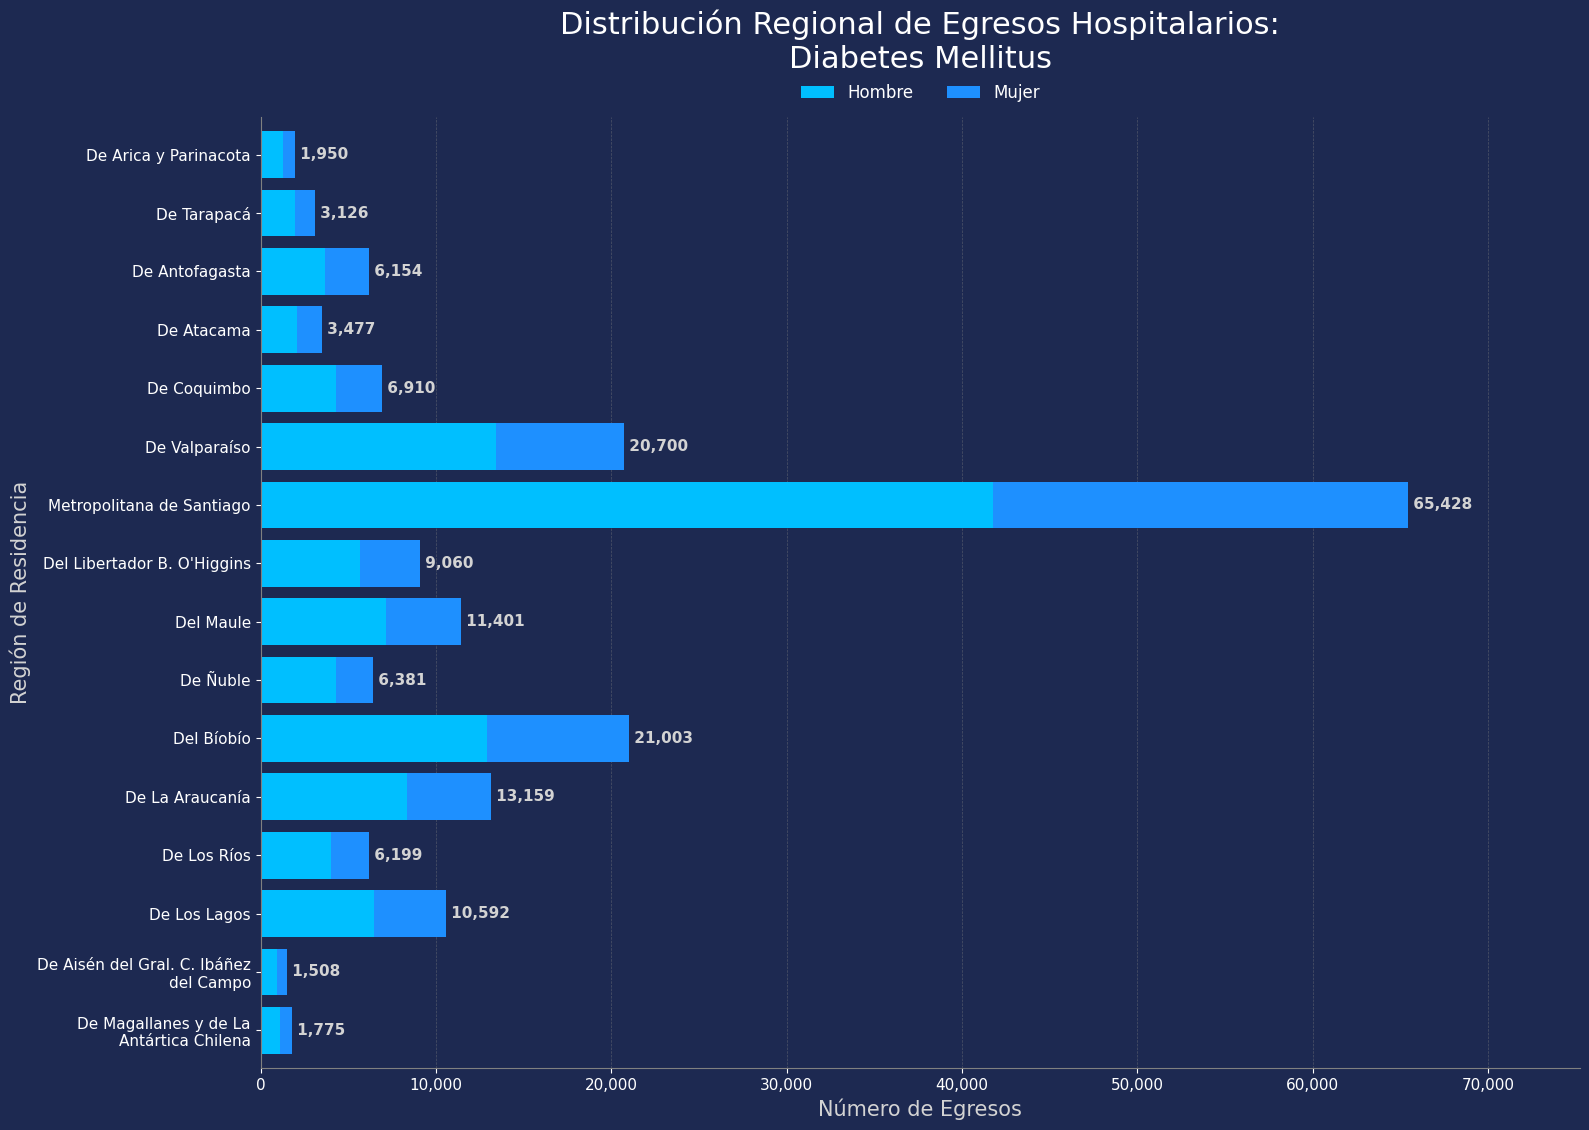

In [44]:
graficar_distribucion_regional(dfc, 'Diabetes mellitus')

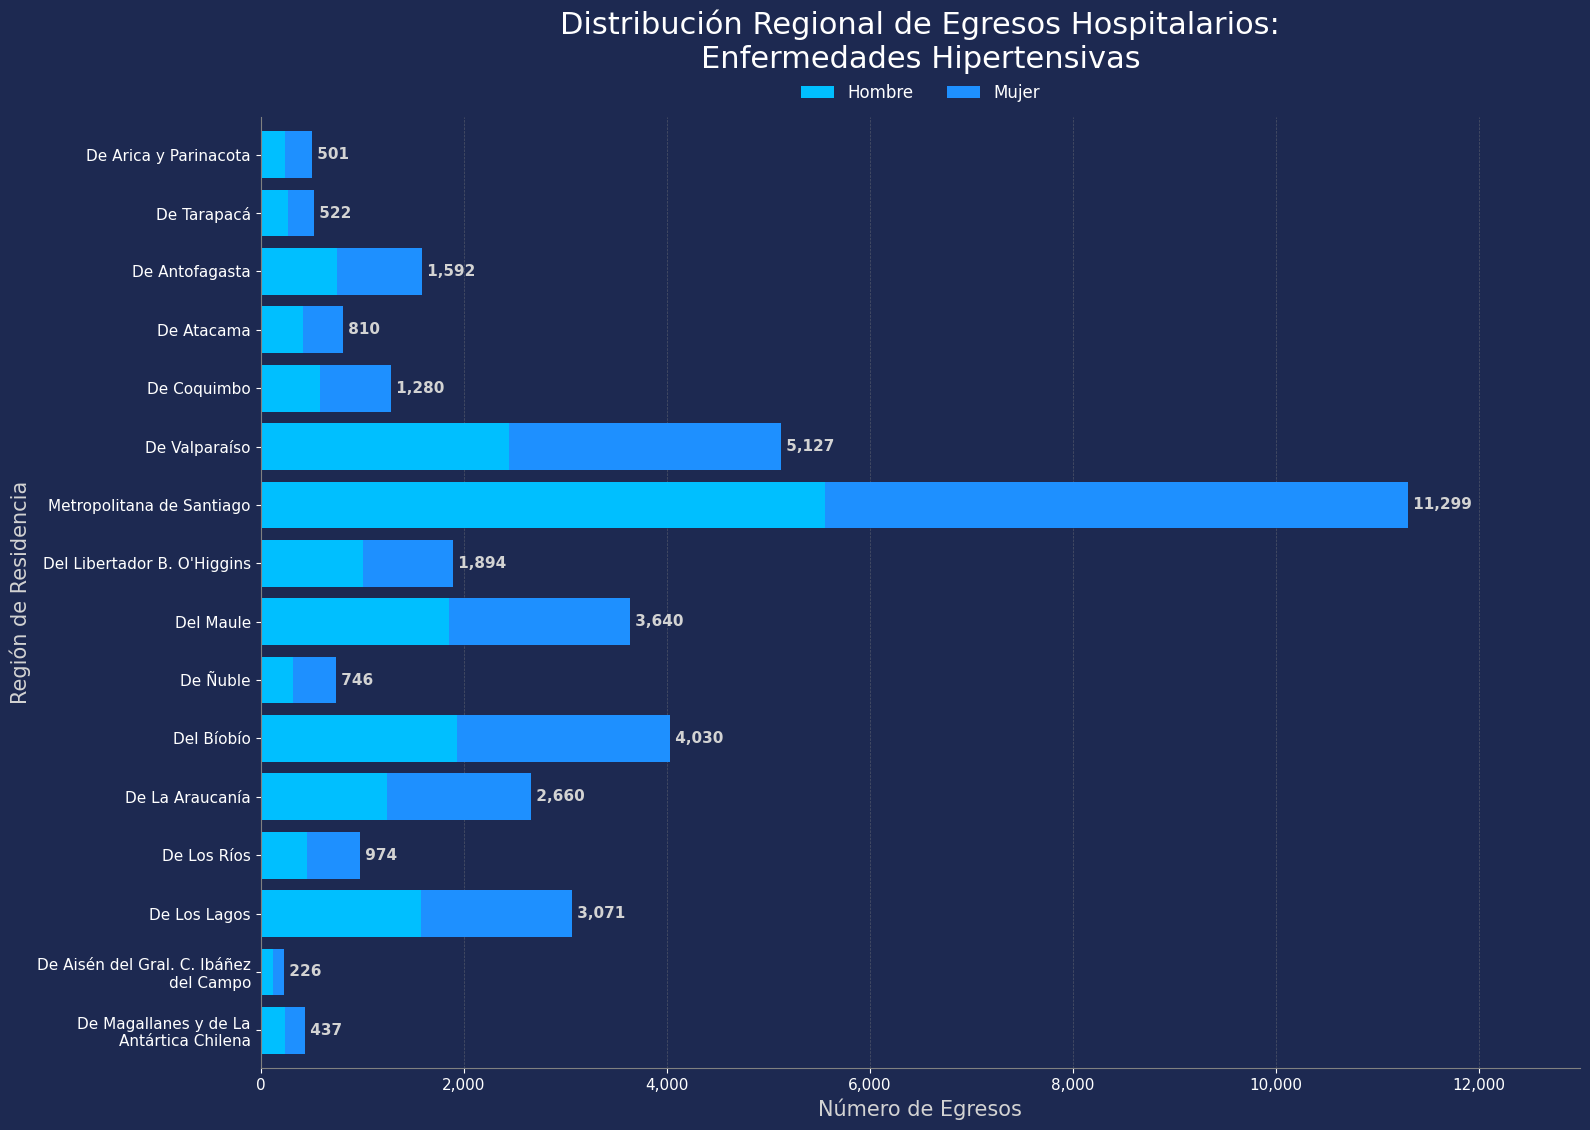

In [46]:
graficar_distribucion_regional(dfc, 'Enfermedades hipertensivas')

### **G8:** Prevalencia de Egresos Hospitalarios por Diabetes Mellitus e Hipertensión en cada Región.
En esta figura se muestra el porcentaje de hospitalizaciones que son por **diabetes** e **hipertensión** en cada región. Al usar tasas relativas en lugar de cifras absolutas, se corrige el efecto del tamaño de la población de cada región, ofreciendo una comparación más cecana a la realidad de la predominancia de estas enfermedades en zonas geográficas específicas.

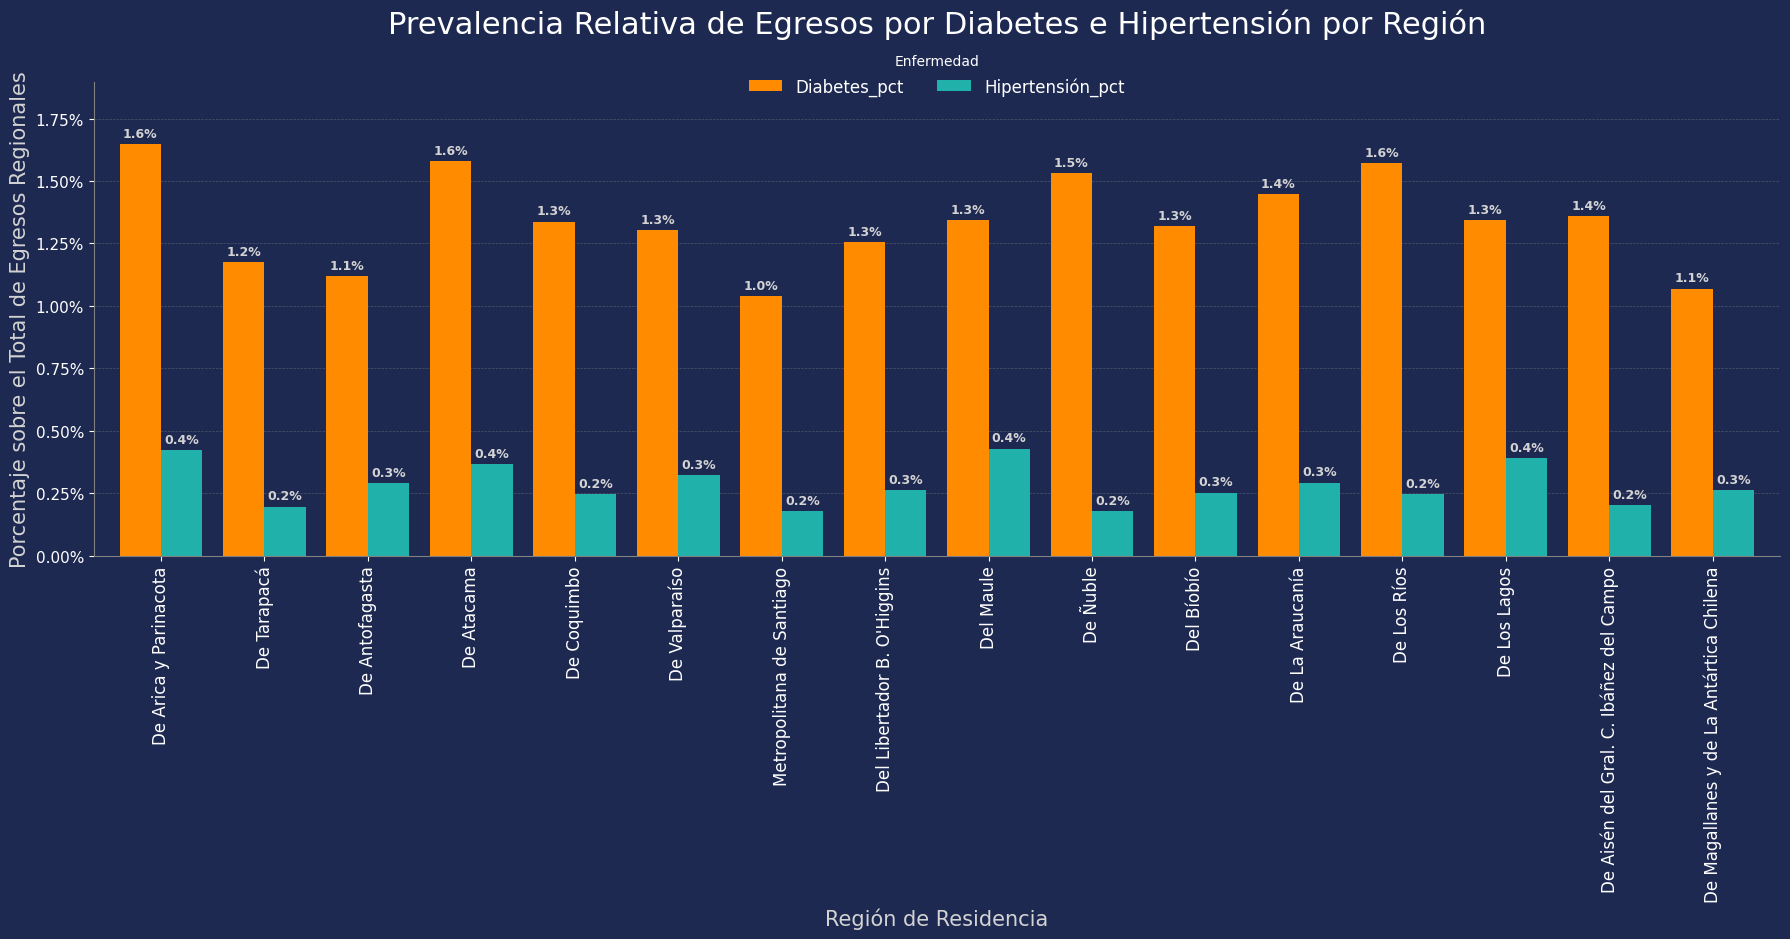

In [47]:
def graficar_prevalencia_regional(dataframe):
    # Agrupar datos
    df = dataframe.copy()
    orden_regiones = [
        'De Arica y Parinacota',
        'De Tarapacá',
        'De Antofagasta',
        'De Atacama',
        'De Coquimbo',
        'De Valparaíso',
        'Metropolitana de Santiago',
        "Del Libertador B. O'Higgins",
        'Del Maule',
        'De Ñuble',
        'Del Bíobío',
        'De La Araucanía',
        'De Los Ríos',
        'De Los Lagos',
        'De Aisén del Gral. C. Ibáñez del Campo',
        'De Magallanes y de La Antártica Chilena'
    ]
    total_egresos = df['REGION_RESIDENCIA'].value_counts()
    diabetes_egresos = dfc[dfc['GRUPO_DIAG1'] == 'Diabetes mellitus']['REGION_RESIDENCIA'].value_counts()
    hipertension_egresos = dfc[dfc['GRUPO_DIAG1'] == 'Enfermedades hipertensivas']['REGION_RESIDENCIA'].value_counts()
    datos_combinados = pd.DataFrame({
        'Total': total_egresos,
        'Diabetes': diabetes_egresos,
        'Hipertensión': hipertension_egresos
    }).fillna(0)
    datos_combinados['Diabetes_pct'] = (datos_combinados['Diabetes'] / datos_combinados['Total']) * 100
    datos_combinados['Hipertensión_pct'] = (datos_combinados['Hipertensión'] / datos_combinados['Total']) * 100
    datos_grafico = datos_combinados[['Diabetes_pct', 'Hipertensión_pct']]
    regiones_presentes_en_orden = [region for region in orden_regiones if region in datos_grafico.index]
    datos_grafico = datos_grafico.reindex(regiones_presentes_en_orden)

    fig, ax = plt.subplots(figsize=(18, 10))

    # Colores
    colores_barras = [color_naranjo_1, color_verde_1]  # Naranja para Diabetes, Verde Mar para Hipertensión
    color_gris_suave = color_gris_2
    color_spines = color_gris_1

    fig.set_facecolor(color_fondo)
    ax.set_facecolor(color_fondo)

    datos_grafico.plot(kind='bar', ax=ax, color=colores_barras, width=0.8)

    # Títulos y Etiquetas
    ax.set_title('Prevalencia Relativa de Egresos por Diabetes e Hipertensión por Región', color=color_texto, fontsize=22, pad=35)
    ax.set_ylabel('Porcentaje sobre el Total de Egresos Regionales', color=color_gris_suave, fontsize=15)
    ax.set_xlabel('Región de Residencia', color=color_gris_suave, fontsize=15)

    # Ejes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(color_spines)
    ax.spines['bottom'].set_color(color_spines)   
    ax.tick_params(axis='x', colors=color_texto, rotation=90, labelsize=12)
    ax.tick_params(axis='y', colors=color_texto, labelsize=11)
    ax.yaxis.set_major_formatter(mticker.PercentFormatter())
    
    # Leyenda
    legend = ax.legend(title='Enfermedad', fontsize=12, frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.09), ncol=2)
    legend.get_title().set_color(color_texto)
    for text in legend.get_texts():
        text.set_color(color_texto)

    # Etiquetas de Datos
    for container in ax.containers:
        ax.bar_label(
            container,
            labels=[f'{v:.1f}%' for v in container.datavalues], # Formato con 1 decimal y '%'
            label_type='edge',
            padding=3,
            color=color_gris_suave,
            fontsize=9,
            fontweight='bold'
        )

    # Grilla y guardado
    max_y = datos_grafico.max().max()
    ax.set_ylim(0, max_y * 1.15)
    ax.grid(axis='y', color=color_spines, linestyle='--', linewidth=0.5, alpha=0.5)
    ax.set_axisbelow(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig("graphics/prevalencia_regional_enfermedades.png", facecolor=color_fondo, bbox_inches='tight')
    plt.show()

graficar_prevalencia_regional(dfc)

### **G9:** Comunas con mayor cantidad de Egresos Hospitalarios por Diabetes Mellitus e Hipertensión.
A través de estos gráficos se puede orientar de manera más específica la implementación de campañas y asignación de recursos para la atención médica especializada en casos de **diabetes** e **hipertensión** respectivamente.

In [48]:
def graficar_top_comunas_promedio_anual(dfc, grupo_diagnostico, top_n=15):
    # Agrupación de datos
    df_enf = dfc[dfc['GRUPO_DIAG1'] == grupo_diagnostico]
    comuna_counts = df_enf['COMUNA_RESIDENCIA'].value_counts()
    num_anos = dfc['ANO_EGRESO'].nunique()
    promedio_anual = comuna_counts / num_anos
    datos_grafico = promedio_anual.nlargest(top_n).sort_values(ascending=True)   
    if datos_grafico.empty:
        print(f"No se encontraron datos para '{grupo_diagnostico}'.")
        return

    # Se crea la figura
    fig, ax = plt.subplots(figsize=(14, 10))

    # Colroes
    color_barras = color_azul_2
    color_gris_suave = 'lightgray'
    color_spines = 'gray'
    
    fig.set_facecolor(color_fondo)
    ax.set_facecolor(color_fondo)

    # Se cea el gráfico de barras horizontales
    datos_grafico.plot(kind='barh', ax=ax, color=color_barras)

    # Títulos y Etiquetas
    ax.set_title(f'Top {top_n} Comunas por Promedio Anual de Egresos:\n{grupo_diagnostico.title()}', color=color_texto, fontsize=20, pad=20)
    ax.set_xlabel('Promedio Anual de Egresos', color=color_gris_suave, fontsize=14)
    ax.set_ylabel('Comuna de Residencia', color=color_gris_suave, fontsize=14)

    # Ejes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(color_spines)
    ax.spines['bottom'].set_color(color_spines)
    ax.tick_params(axis='x', colors=color_texto, labelsize=11)
    ax.tick_params(axis='y', colors=color_texto, labelsize=12)
    ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, p: f'{int(x):,}'))

    # Etiquetas de Datos
    for container in ax.containers:
        ax.bar_label(
            container,
            labels=[f'{v:,.0f}' for v in container.datavalues],
            label_type='edge',
            padding=5,
            color=color_gris_suave,
            fontsize=11,
            fontweight='bold'
        )
    
    ax.set_xlim(0, datos_grafico.max() * 1.18)

    # Grilla y guardado
    ax.grid(axis='x', color=color_spines, linestyle='--', linewidth=0.5, alpha=0.5)
    ax.set_axisbelow(True)
    plt.tight_layout()
    plt.savefig(f"graphics/top_promedio_anual_comunas_{grupo_diagnostico.replace(' ', '_').lower()}.png", facecolor=color_fondo, bbox_inches='tight')
    plt.show()

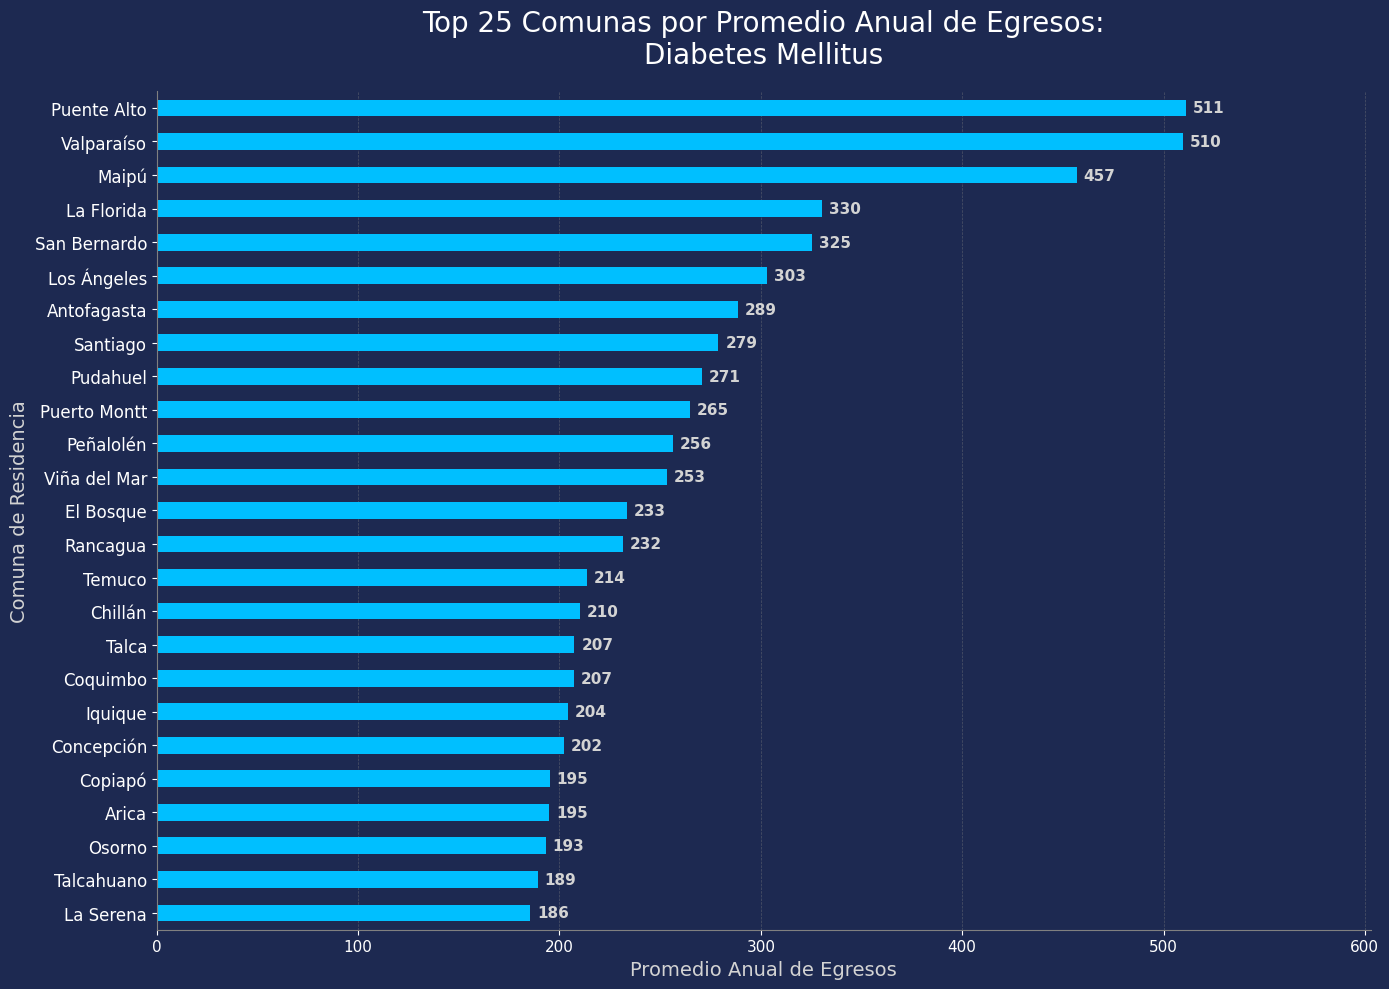

In [49]:
graficar_top_comunas_promedio_anual(dfc, "Diabetes mellitus", top_n=25)

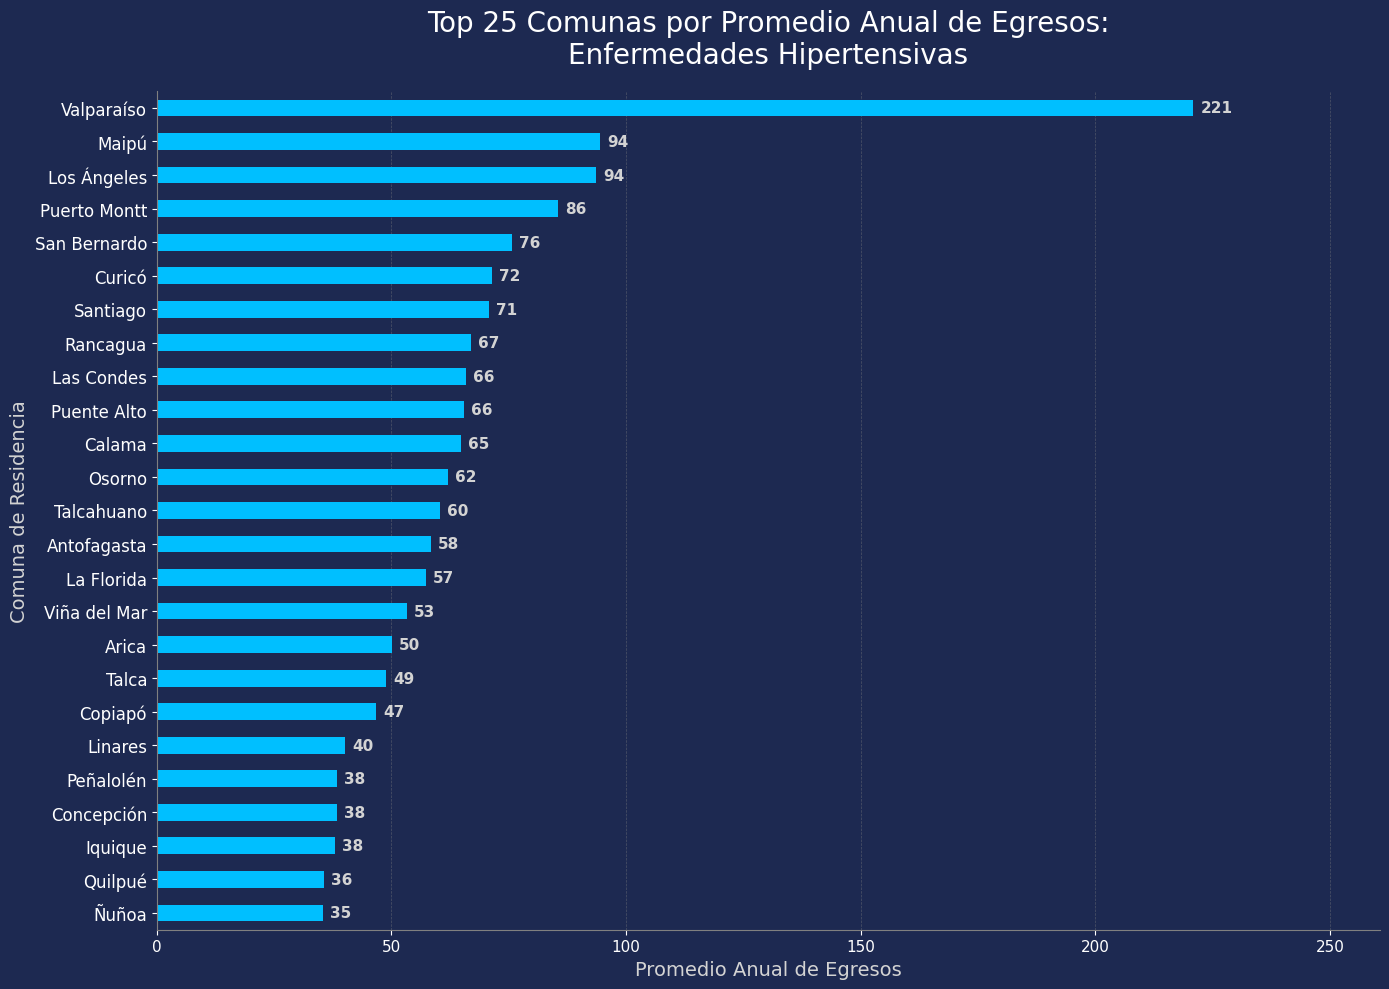

In [50]:
graficar_top_comunas_promedio_anual(dfc, "Enfermedades hipertensivas", top_n=25)

## 3.4. Análisis Clínico y del Sistema de Salud
---

### **G10:** Distribución General de Egresos Hospitalarios por pertenencia al SNSS y previsión de los pacientes
A través de estos gráficos podemos entender como se distribuye la carga hopitalaria entre el sistema público y el privado, y a su vez, como se distribuyen los distintos tipos de previsión dentro de cada uno de las dos modalidades de centros de atención médica. De esta forma, podemos responder preguntas como cuántas personas con FONASA prefieren atenderse en el sistema privado pagando un copago, si existen personas con ISAPRE que recurren a centros pertenecientes al SNSS y como varían estás proporciones para cada tipo de diagnóstico.

In [66]:
def graficar_pie_anidado_snss(dataframe, grupo_diag):
    # Agrupación de datos
    df = dataframe.copy()
    df_diag = df[df['GRUPO_DIAG1'] == grupo_diag]
    counts_inner = df_diag['PERTENECE_SNSS'].value_counts()
    counts_outer = df_diag.groupby(['PERTENECE_SNSS', 'CATEGORIA_PREVISION']).size()
    counts_outer = counts_outer.reindex(counts_inner.index, level='PERTENECE_SNSS')

    # Figura
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))
    color_fondo = '#1D2951'
    color_texto = 'white'
    fig.set_facecolor(color_fondo)

    # Colores
    colores_inner = [
        color_azul_1, # Publico
        color_verde_1  # Privado
    ] 
    colores_outer = [
        '#5f5f5f', # Fuerzas Armadas y de Orden
        '#949494', # Sin Información
        '#dbdbdb', # Sin previsión
        color_verde_2, # Sistema Privado
        color_azul_2  # Sistema Público
    ]

    # Anillo Exterior
    wedges_outer, _ = ax.pie(
        counts_outer, 
        radius=1, 
        colors=colores_outer,
        wedgeprops=dict(width=0.35, edgecolor=color_fondo, linewidth=2)
    )

    # Anillo Interior
    wedges_inner, labels_inner = ax.pie(
        counts_inner, 
        radius=1 - 0.35, 
        colors=colores_inner,
        wedgeprops=dict(width=0.4, edgecolor=color_fondo, linewidth=2),
        labels=[f"{v/counts_inner.sum()*100:.1f}%" for v in counts_inner],
        textprops=dict(color=color_texto, fontsize=12, weight='bold'),
        labeldistance=0.5
    )

    # Título y Leyenda
    ax.set_title(
        f"Egresos según SNSS y Previsión:\n{grupo_diag.title()}",
        color=color_texto,
        fontsize=20,
        pad=20,
        x=0.75
    )

    # Etiquetas Para el Anillo Exterior
    cumulative_angle = 0
    for group, value in counts_outer.items():
        parent_group = group[0]
        parent_total = counts_inner[parent_group]
        percentage = (value / parent_total) * 100
        angle_width = (value / counts_outer.sum()) * 360
        center_angle = cumulative_angle + (angle_width / 2)
        angle_rad = np.deg2rad(center_angle)
        
        r = 0.825
        x = r * np.cos(angle_rad)
        y = r * np.sin(angle_rad)
        
        if percentage > 3:
            ax.text(x, y, f"{percentage:.1f}%", ha='center', va='center', color='white', weight='bold')     
        cumulative_angle += angle_width
    
    # Leyenda
    legend_labels = [
        f"Sistema Público: {counts_inner.get('Si', 0):,}",
        f"Sistema Privado: {counts_inner.get('No', 0):,}",
        f"FONASA",
        f"ISAPRE",
        f"CAPREDENA y DIPRECA",
        f"Sin Información",
        f"Sin Previsión"
    ]
    legend_colors = colores_inner + [colores_outer[4]] + [colores_outer[3]] + colores_outer[:4] 
    from matplotlib.patches import Patch
    legend_elements = [Patch(facecolor=color, label=label) for color, label in zip(legend_colors, legend_labels)]
    legend = ax.legend(
        handles=legend_elements,
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
        fontsize=12,
        frameon=False
    )
    for text in legend.get_texts():
        text.set_color(color_texto)

    # Ajustar el layout 
    plt.tight_layout(rect=[0, 0, 0.8, 1]) 
    plt.savefig(f"graphics/distribucion_snss_prevision_{grupo_diag.replace(' ', '_').lower()}.png", facecolor=color_fondo, bbox_inches='tight', dpi=150)
    plt.show()

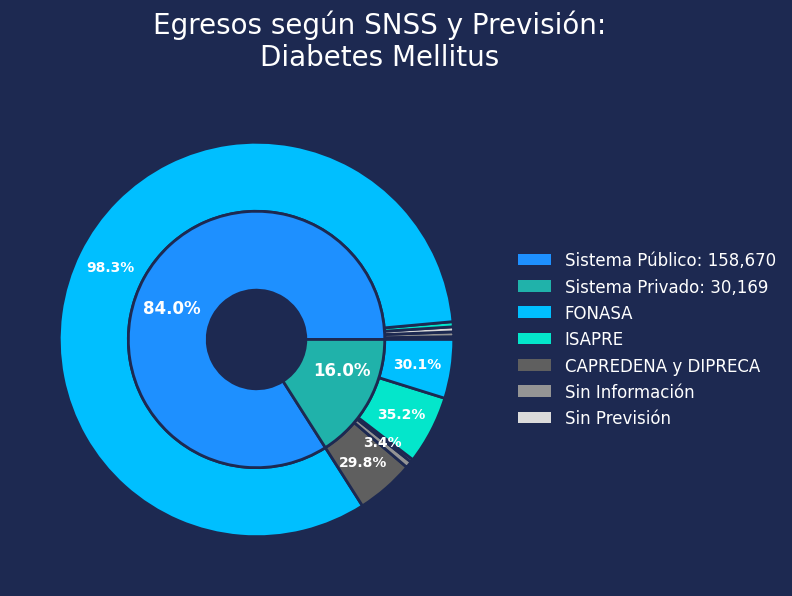

In [67]:
graficar_pie_anidado_snss(dfc, 'Diabetes mellitus')

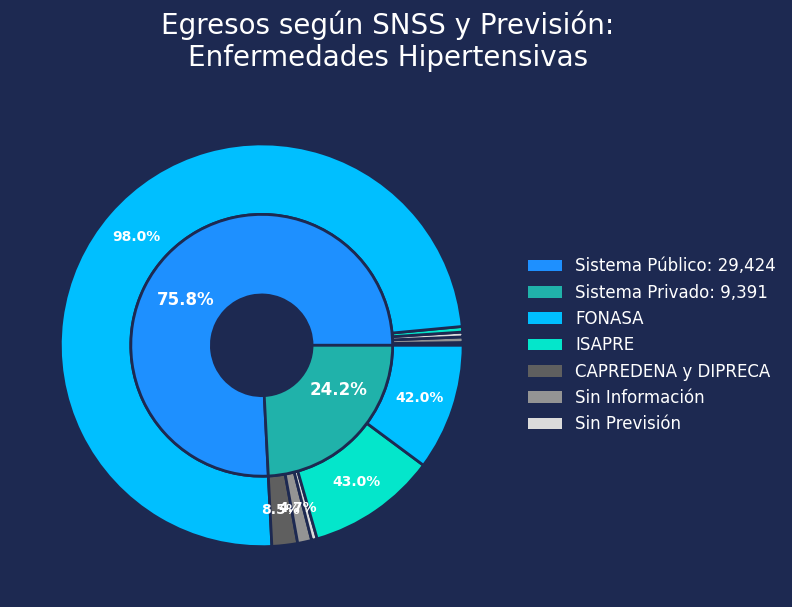

In [68]:
graficar_pie_anidado_snss(dfc, 'Enfermedades hipertensivas')

### **G11**: Distribución de Días de Estadía según Grupo Etario.
En este gráfico se muestra como se varía la severidad hospitalaria para los casos de **diabetes** e **hipertensión** según cada rango etario. Se muestra la mediana, los rangos intercuartílicos y los valores atípicos (estadías extremadamente largas), lo que entrega una idea completa de la distribución de la estancia hospitalaria y cómo varía entre los diferentes grupos.

In [69]:
def graficar_boxplot_estadia_por_edad(dataframe, grupo_diag):
    # Agrupación de datos
    df = dataframe.copy()
    df = df[df['GRUPO_DIAG1'] == grupo_diag]
    df = df[['GRUPO_EDAD', 'DIAS_ESTADIA']]
    df['DIAS_ESTADIA'] = pd.to_numeric(df['DIAS_ESTADIA'], errors='coerce')
    df.dropna(subset=['DIAS_ESTADIA'], inplace=True)
    limite_visualizacion = 30
    datos_grafico = df[df['DIAS_ESTADIA'] <= limite_visualizacion]
    orden_edades = [
        '<1 año', '1-9 años', '10-19 años', '20-29 años', '30-39 años',
        '40-49 años', '50-59 años', '60-69 años', '70-79 años', '80+ años'
    ]

    fig, ax = plt.subplots(figsize=(16, 9))

    # Colores
    color_cajas = color_azul_2
    color_gris_suave = color_gris_2
    color_spines = color_gris_1
    color_mediana = color_naranjo_1

    fig.set_facecolor(color_fondo)
    ax.set_facecolor(color_fondo)

    sns.boxplot(
        x='GRUPO_EDAD',
        y='DIAS_ESTADIA',
        data=datos_grafico,
        order=orden_edades,
        ax=ax,
        color=color_cajas,
        boxprops=dict(edgecolor=color_gris_suave),
        whiskerprops=dict(color=color_gris_suave),
        capprops=dict(color=color_gris_suave),
        medianprops=dict(color=color_mediana, linewidth=3),
        flierprops=dict(markerfacecolor='cyan', marker='.', markersize=5, linestyle='none', markeredgecolor='none')
    )

    # Títulos y Etiquetas
    ax.set_title(f'Distribución de Días de Estadía por Grupo de Edad:\n{grupo_diag.title()}', color=color_texto, fontsize=22, pad=20)
    ax.set_ylabel(f'Días de Estadía (visualización limitada a {limite_visualizacion} días)', color=color_gris_suave, fontsize=15)
    ax.set_xlabel('Grupo de Edad', color=color_gris_suave, fontsize=15)

    # Ejes
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(color_spines)
    ax.spines['bottom'].set_color(color_spines)
    ax.tick_params(axis='x', colors=color_texto, rotation=45, labelsize=12)
    ax.tick_params(axis='y', colors=color_texto, labelsize=11)
    
    # Grilla y guardado
    ax.grid(axis='y', color=color_spines, linestyle='--', linewidth=0.5, alpha=0.5)
    ax.set_axisbelow(True)
    
    plt.tight_layout()
    plt.savefig(f"graphics/boxplot_estadia_por_edad_{grupo_diag.replace(' ', '_').lower()}.png", facecolor=color_fondo, bbox_inches='tight')
    plt.show()

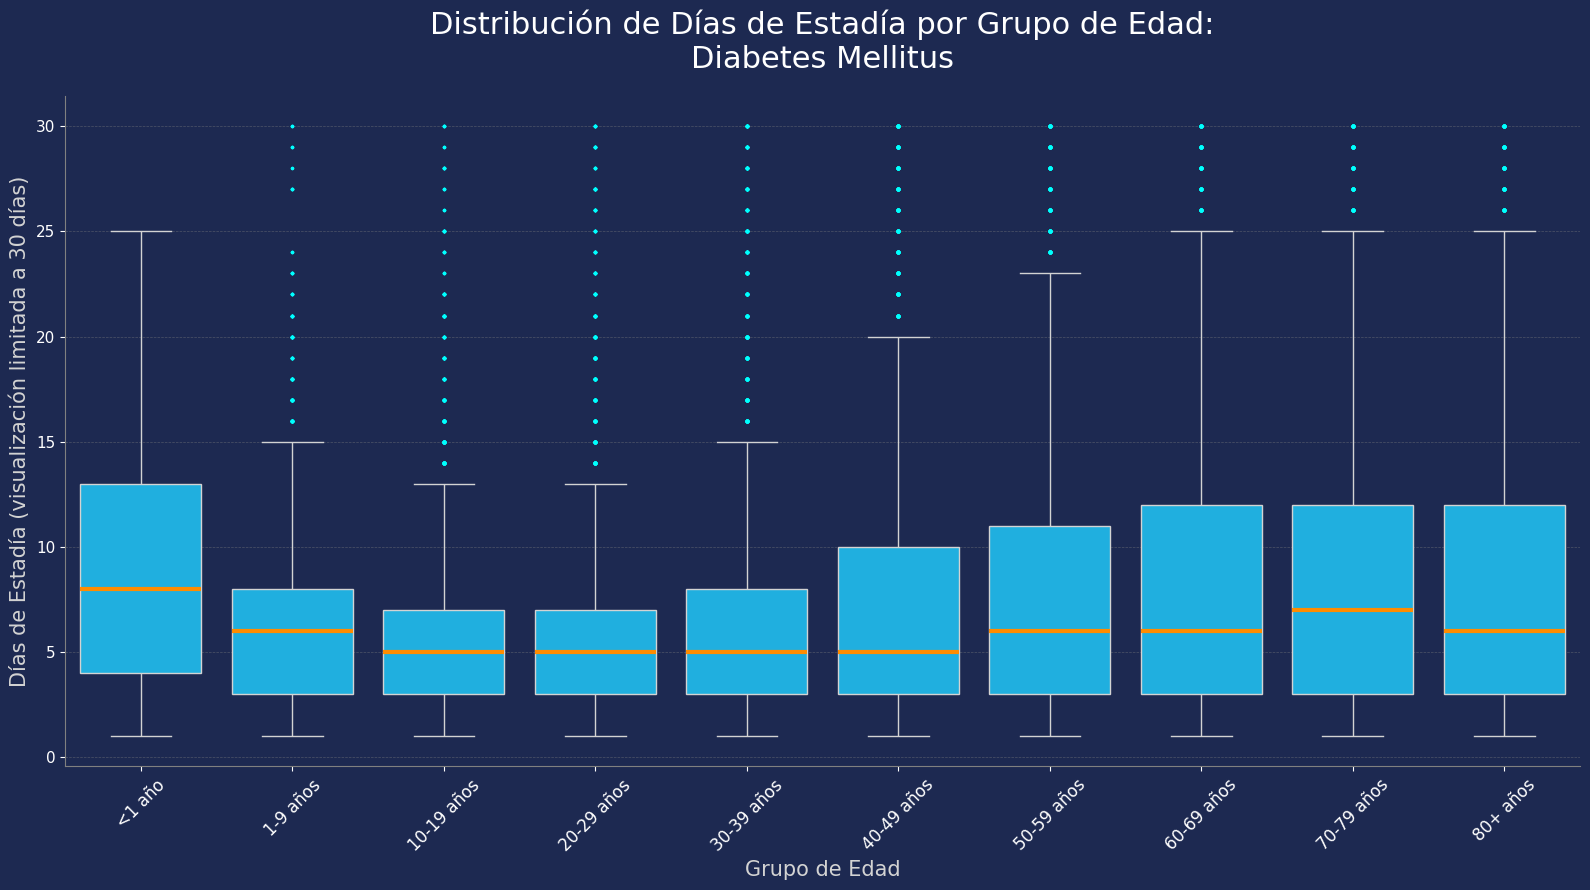

In [70]:
graficar_boxplot_estadia_por_edad(dfc, 'Diabetes mellitus')

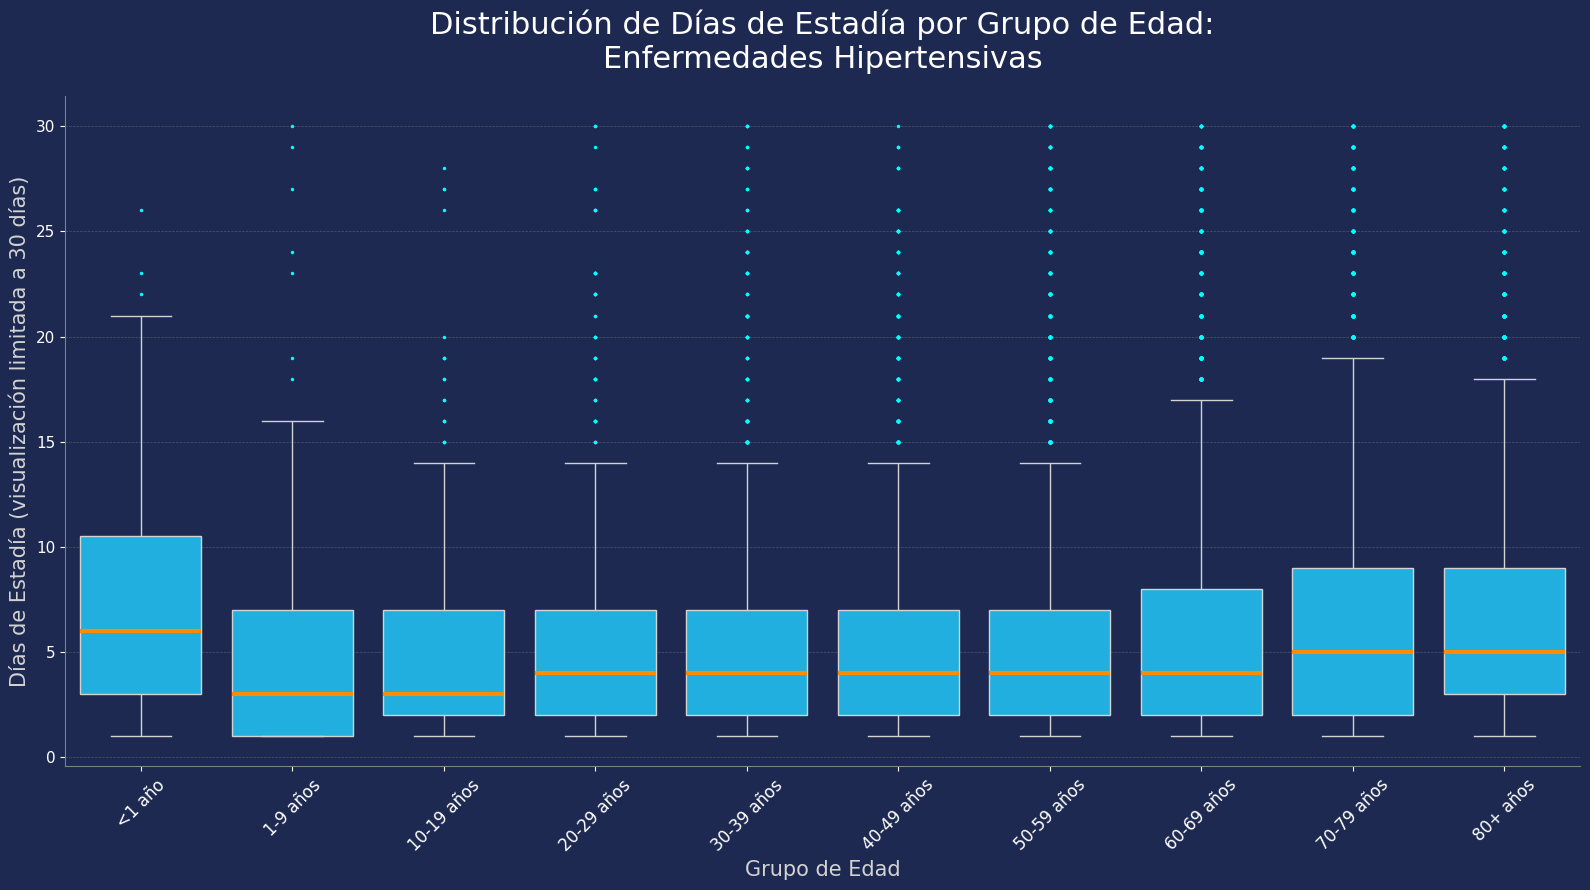

In [71]:
graficar_boxplot_estadia_por_edad(dfc, 'Enfermedades hipertensivas')

### **G12**: Tasa de mortalidad hospitalaria para Diabetes e Hipertensión.
Finalmente, se analiza la evolución de la tasa de mortalidad hospitalaria para los casos de **diabetes** e **hipertensión** en comparación a la tasa general. Tal como se esperaba, durante los años de pandemia de COVID-19 se observa un alza importante, replicada en los casos de hipertensión, y con menor intensidad, en los casos de diabetes mellitus. De este gráfico podemos identificar un riesgo de mortalidad superior asociado a los casos de hospitalización por enfermedades hipertensivas, lo que implica un cuidado más intensivo y la implementación de medidas de cuidado más exigentes que en el caso de la diabetes.

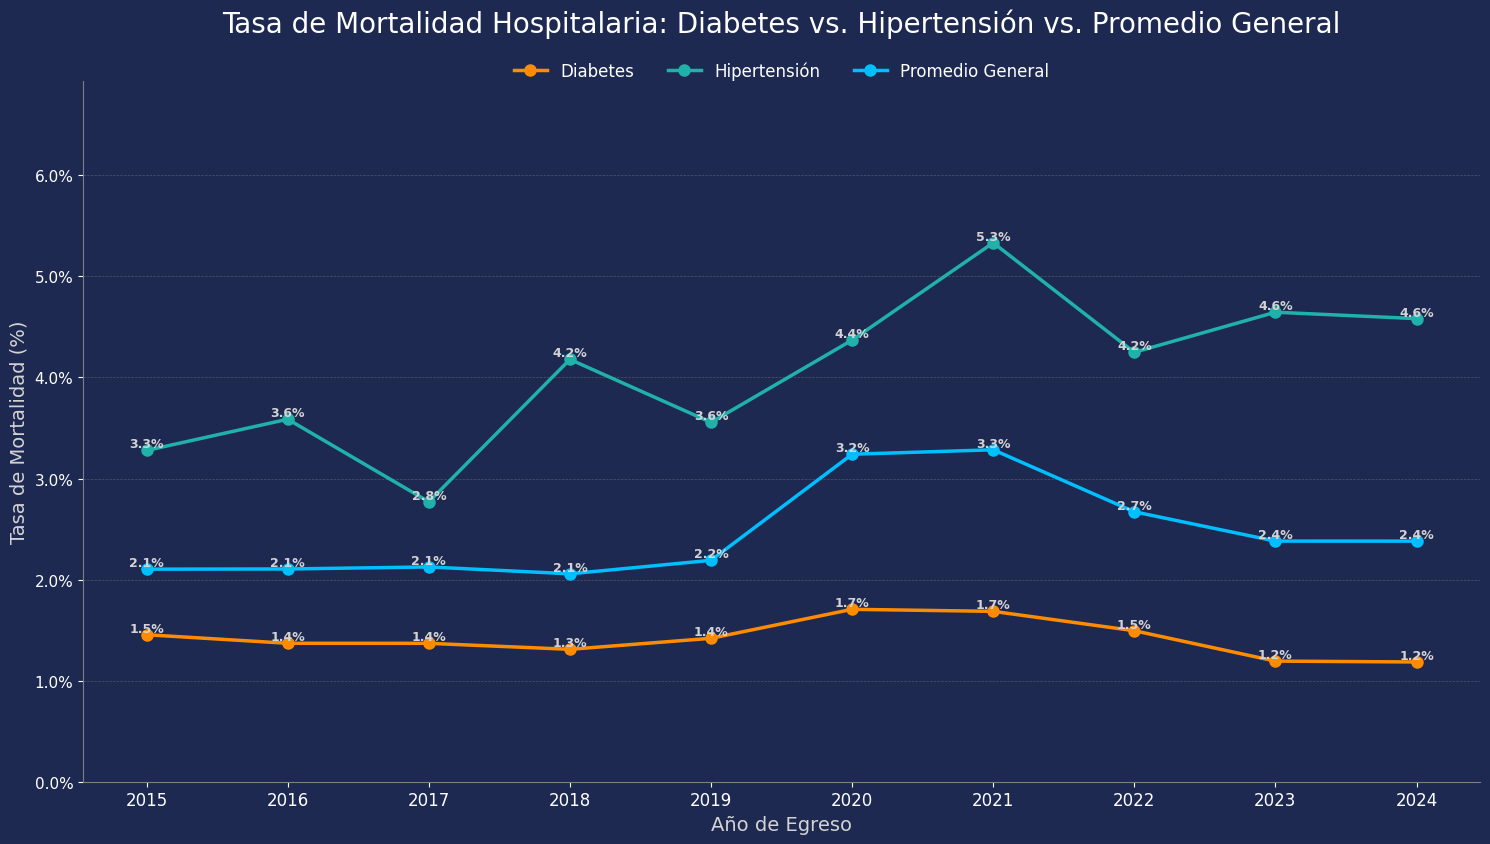

In [72]:
def graficar_tasa_mortalidad_anual(dataframe):
    df = dataframe.copy()
    # Agrupación de los datos
    try:
        dfc_calc = dfc.dropna(subset=['CONDICION_EGRESO', 'ANO_EGRESO', 'GRUPO_DIAG1']).copy()
        dfc_calc['ANO_EGRESO'] = pd.to_numeric(dfc_calc['ANO_EGRESO'], errors='coerce')
        dfc_calc.dropna(subset=['ANO_EGRESO'], inplace=True)

        def calcular_tasa_vectorizada(df_grupo):
            if df_grupo.empty:
                return pd.Series(dtype=float)
            tasas = df_grupo.groupby('ANO_EGRESO')['CONDICION_EGRESO'].value_counts(normalize=True).unstack(fill_value=0)
            return tasas.get('Fallecido', 0) * 100

        df_diabetes = dfc_calc[dfc_calc['GRUPO_DIAG1'] == "Diabetes mellitus"]
        df_hipertension = dfc_calc[dfc_calc['GRUPO_DIAG1'] == "Enfermedades hipertensivas"]
        tasa_diabetes_anual = calcular_tasa_vectorizada(df_diabetes)
        tasa_hipertension_anual = calcular_tasa_vectorizada(df_hipertension)
        tasa_total_anual = calcular_tasa_vectorizada(dfc_calc)
        
        datos_grafico = pd.DataFrame({
            'Diabetes': tasa_diabetes_anual,
            'Hipertensión': tasa_hipertension_anual,
            'Promedio General': tasa_total_anual
        })
        datos_grafico.sort_index(inplace=True)

    except Exception as e:
        print(f"Error al preparar los datos: {e}")
        return

    fig, ax = plt.subplots(figsize=(15, 9))
    
    # Colores
    colores_lineas = ['#FF8C00', '#20B2AA', '#00BFFF']
    color_gris_suave = 'lightgray'
    color_spines = 'gray'
    fig.set_facecolor(color_fondo)
    ax.set_facecolor(color_fondo)

    # Crear el gráfico
    datos_grafico.plot(kind='line', ax=ax, color=colores_lineas, marker='o', linestyle='-', linewidth=2.5, markersize=8)
    ax.set_title('Tasa de Mortalidad Hospitalaria: Diabetes vs. Hipertensión vs. Promedio General', color=color_texto, fontsize=20, pad=35)
    ax.set_ylabel('Tasa de Mortalidad (%)', color=color_gris_suave, fontsize=14)
    ax.set_xlabel('Año de Egreso', color=color_gris_suave, fontsize=14)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_color(color_spines)
    ax.spines['bottom'].set_color(color_spines)
    ax.tick_params(axis='x', colors=color_texto, rotation=0, labelsize=12)
    ax.tick_params(axis='y', colors=color_texto, labelsize=11)
    ax.yaxis.set_major_formatter(mticker.PercentFormatter(xmax=100.0))
    ax.xaxis.set_major_locator(mticker.MaxNLocator(integer=True))
    if not datos_grafico.empty:
        plt.xticks(datos_grafico.index.astype(int))
    
    legend = ax.legend(fontsize=12, frameon=False, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)
    for text in legend.get_texts():
        text.set_color(color_texto)
        
    for line_name in datos_grafico.columns:
        for year, value in datos_grafico[line_name].items():
            if pd.notna(value):
                ax.text(year, value, f'{value:.1f}%', ha='center', va='bottom', color=color_gris_suave, fontsize=9, fontweight='bold')

    max_y = datos_grafico.max().max() if not datos_grafico.empty else 10
    ax.set_ylim(0, max_y * 1.30)
    ax.grid(axis='y', color=color_spines, linestyle='--', linewidth=0.5, alpha=0.5)
    ax.set_axisbelow(True)

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.savefig("graphics/tasa_mortalidad_comparativa.png", facecolor=color_fondo, bbox_inches='tight')
    plt.show()
    
graficar_tasa_mortalidad_anual(dfc)